# Import Modules

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

In [2]:
#Sklearn Machine Learning & Data Modeling
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import svm

C:\Users\dfoley\Documents\Canopy\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Imports for K-N
from sklearn.dummy import DummyRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.dist_metrics import EuclideanDistance
from sklearn.preprocessing import Imputer
from math import sqrt

C:\Users\dfoley\Documents\Canopy\User\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
# Set default matplot figure size
import pylab as py
py.rcParams['figure.figsize'] = (13.0, 9.0)

In [5]:
#Import abalone.csv File
abalone = pd.read_csv('abalone.csv')

In [6]:
Abalone = pd.DataFrame(abalone, columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight',
                                            'Viscera weight','Shell weight','Rings'])

In [7]:
np.mean(Abalone['Rings'])

9.9307950191570882

# Tasks 1

Reference 

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.any.html


In [8]:
#Check if DataSet has Null Values
Abalone.isnull().any().any()

True

Shows that we have Null Values.

In [9]:
Abalone.isnull().any()

Sex                True
Length            False
Diameter          False
Height            False
Whole weight       True
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings              True
dtype: bool

Columns Sex, Whole Weight and Rings have Null Values.  

In [10]:
#Displaying Missing Value.
Abalone[pd.isnull(Abalone).any(axis=1)]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1858    F   0.510     0.400   0.120           NaN          0.3470   
3505    M   0.625     0.495   0.180        1.0815          0.4715   
3800  NaN   0.740     0.580   0.205        2.3810          0.8155   

      Viscera weight  Shell weight  Rings  
1858          0.1105        0.1950   10.0  
3505          0.2540        0.3135    NaN  
3800          0.4695        0.4880   12.0

In [11]:
#Remove Missing Value from DataSet
Abalone = Abalone.dropna()

#Recheck that Abalone DataSet doesn't contain any Missing Values from the DataSet
Abalone.isnull().any().any()

False

.

Reference 

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

http://seaborn.pydata.org/generated/seaborn.factorplot.html



In [12]:
#Use the The Describe Function
Abalone.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4174.000000  4174.000000  4174.000000   4174.000000     4174.000000   
mean      0.523920     0.407821     0.139496      0.827987        0.359234   
std       0.120079     0.099231     0.041824      0.490554        0.221924   
min       0.075000     0.055000     0.000000     -0.738000        0.001000   
25%       0.450000     0.350000     0.115000      0.441125        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.335750   
75%       0.615000     0.480000     0.165000      1.153000        0.501875   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4174.000000   4174.000000  4174.000000  
mean         0.180524      0.238764     9.930283  
std          0.109551      0.139193     3.229563  
min          0.000500      0.001500    -1.000000  
25%          0.093125      0.130000     8.000000  
50%          0.170750      0.233750     9.000000  
75%          0.252500      0.328875    11.000000  
max          0.760000      1.005000    29.000000

Whole Weight has a Value with -0.7 and Rings have -1 as a Value this has to Erroneous Data.

In [13]:
#Display the Ring Vlaue that is Showing as -1
Abalone_Rings = Abalone['Rings'] < 0
Abalone[Abalone_Rings]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
335   M    0.62     0.465    0.19        1.3415          0.5705   

     Viscera weight  Shell weight  Rings  
335          0.3175         0.355   -1.0

We can See the Ring Value with the

In [14]:
#Display the Whole Weight Value that is showing -0.738
Abalone_WholeWeight = Abalone['Whole weight'] < 0
Abalone[Abalone_WholeWeight]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
3291   M    0.53     0.405    0.13        -0.738          0.2845   

      Viscera weight  Shell weight  Rings  
3291            0.17         0.193    9.0

In [19]:
#Drop the Ring Value with Erroneous Data
Abalone = Abalone.drop(Abalone.index[Abalone['Rings'] < 0])
Abalone_Rings = Abalone['Rings'] < 0
Abalone[Abalone_Rings]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

In [20]:
#Drop the Whole Weight Value with Erroneous Data
Abalone = Abalone.drop(Abalone.index[Abalone['Whole weight'] < 0])
Abalone_WholeWeight = Abalone['Whole weight'] < 0
Abalone[Abalone_WholeWeight]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

In [21]:
#Call the Describe Function Again to make sure
Abalone.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4172.000000  4172.000000  4172.000000   4172.000000     4172.000000   
mean      0.523895     0.407808     0.139486      0.828239        0.359202   
std       0.120099     0.099250     0.041826      0.490008        0.221950   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441375        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.335750   
75%       0.615000     0.480000     0.165000      1.153000        0.501625   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4172.000000   4172.000000  4172.000000  
mean         0.180493      0.238747     9.933126  
std          0.109557      0.139213     3.225867  
min          0.000500      0.001500     1.000000  
25%          0.093000      0.130000     8.000000  
50%          0.170750      0.233750     9.000000  
75%          0.252500      0.328625    11.000000  
max          0.760000      1.005000    29.000000

In [22]:
Abalone_Height = Abalone['Height'] < 0.01
Abalone[Abalone_Height]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Rings  
1257          0.0860        0.1150    8.0  
3996          0.0285        0.3505    6.0

In [23]:
#Drop the Height Value with Erroneous Data
Abalone = Abalone.drop(Abalone.index[Abalone['Height'] < 0.01])
Abalone_Height = Abalone['Height'] < 0
Abalone[Abalone_Height]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

In [24]:
#Call the Describe Function Again to make sure
Abalone.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4170.000000  4170.000000  4170.000000   4170.000000     4170.000000   
mean      0.523968     0.407867     0.139553      0.828502        0.359311   
std       0.120075     0.099230     0.041725      0.489968        0.221941   
min       0.075000     0.055000     0.010000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441625        0.186000   
50%       0.545000     0.425000     0.140000      0.799750        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.501875   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4170.000000   4170.000000  4170.000000  
mean         0.180552      0.238750     9.934532  
std          0.109548      0.139222     3.225927  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.233750     9.000000  
75%          0.252500      0.328500    11.000000  
max          0.760000      1.005000    29.000000

In [25]:
Abalone_Height = Abalone['Viscera weight'] < 0.0007
Abalone[Abalone_Height]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
236    I   0.075     0.055    0.01        0.0020          0.0010   
3522   I   0.240     0.185    0.06        0.0655          0.0295   

      Viscera weight  Shell weight  Rings  
236           0.0005        0.0015    1.0  
3522          0.0005        0.0200    4.0

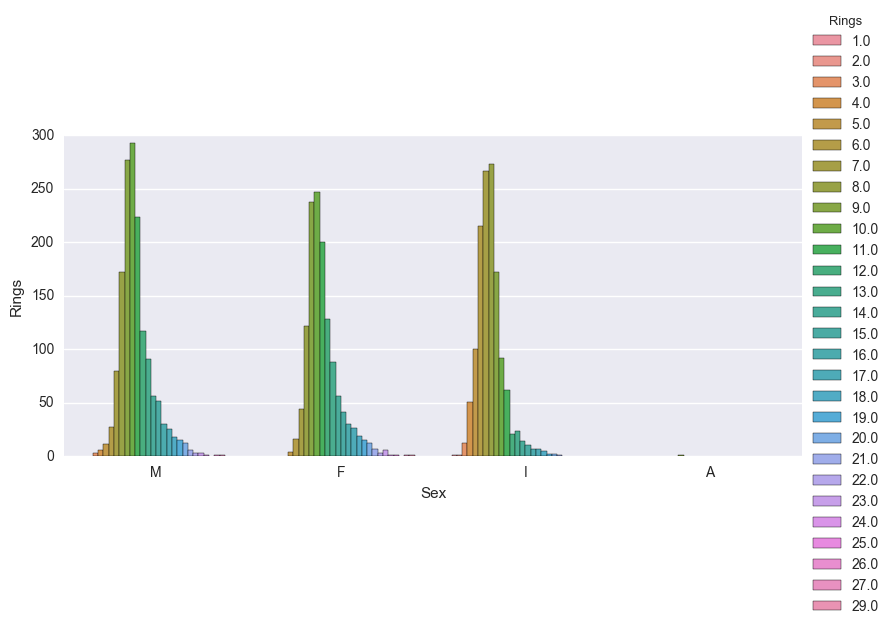

In [54]:
AbaloneFactorPlot = sns.factorplot('Sex',data=Abalone,kind='count',aspect=2,hue='Rings')
AbaloneFactorPlot.set_xlabels('Sex')
AbaloneFactorPlot.set_ylabels('Rings')

In [26]:
#Display Category A
Abalone_Sex = Abalone['Sex'] == 'A'
Abalone[Abalone_Sex]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
112   A   0.435      0.32    0.08        0.3325          0.1485   

     Viscera weight  Shell weight  Rings  
112          0.0635         0.105    9.0

In [27]:
#Drop the Sex A Category
Abalone = Abalone.drop(Abalone.index[Abalone['Sex'] == 'A'])
Abalone_Sex = Abalone['Sex'] == 'A'
Abalone[Abalone_Sex]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

.

.

.

Reference 


http://seaborn.pydata.org/generated/seaborn.pairplot.html

http://seaborn.pydata.org/generated/seaborn.lmplot.html


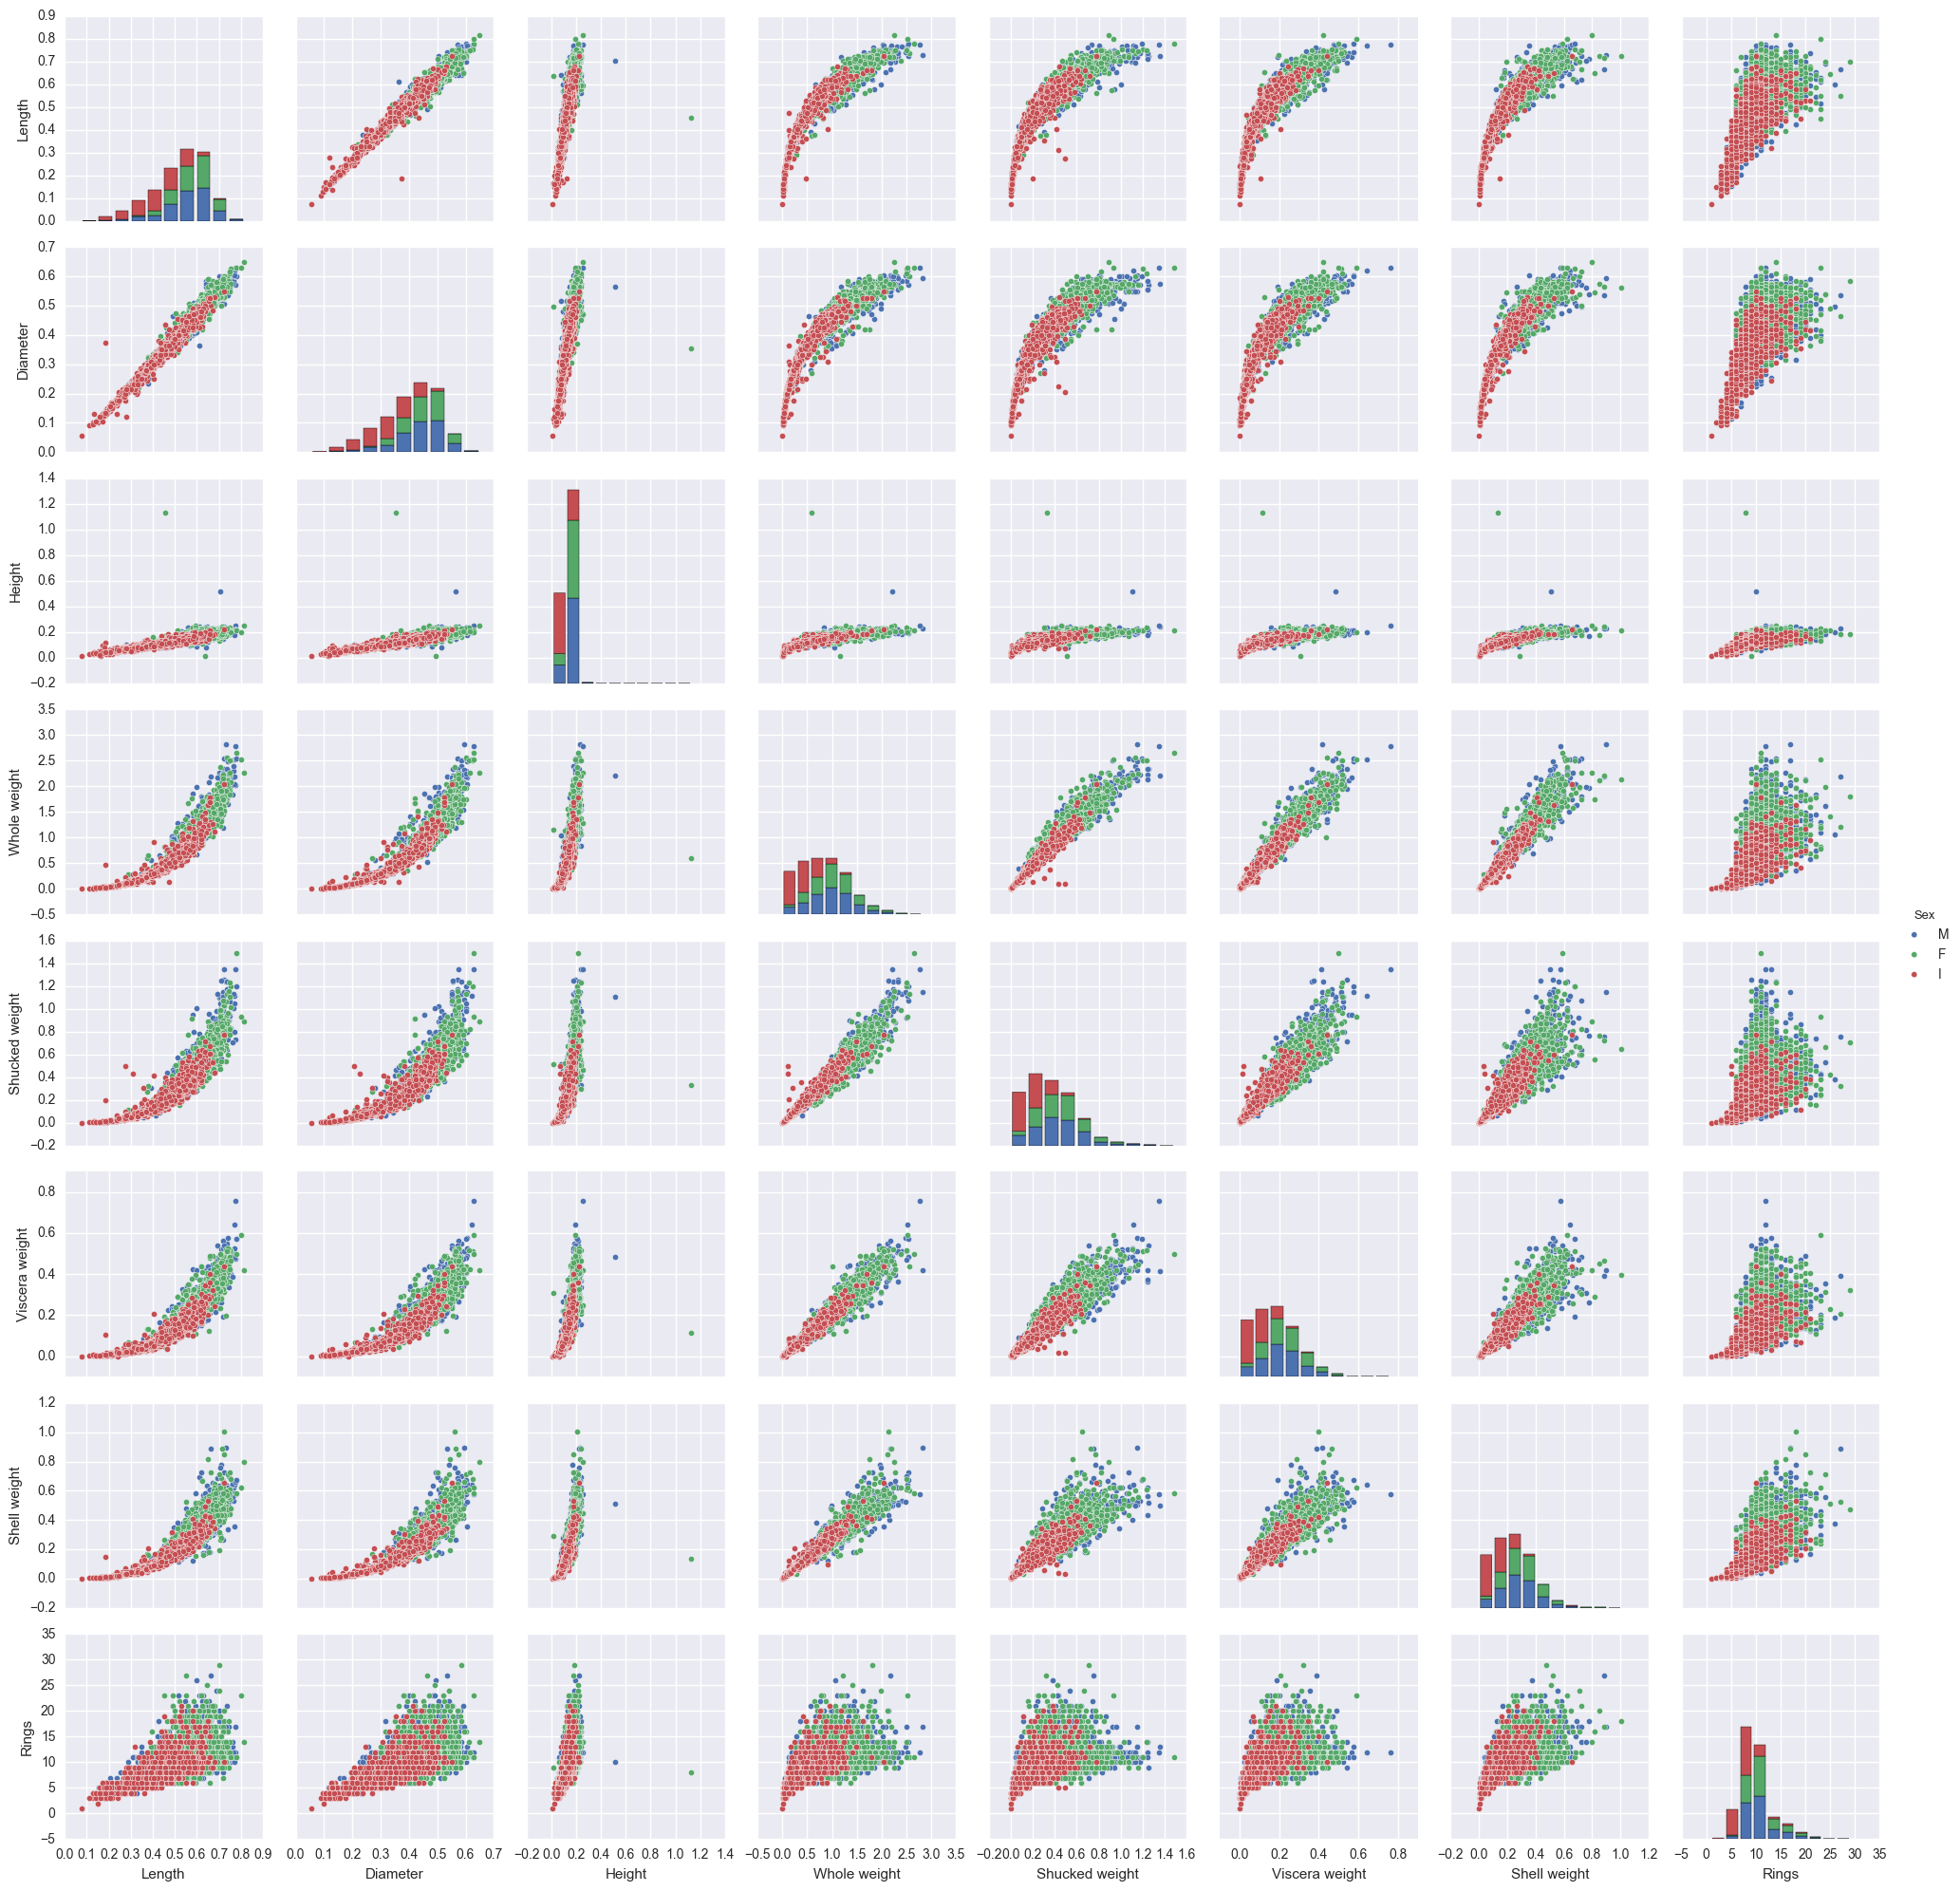

In [57]:
#Using pair plots creates a grid of Axes for Each Variable in the Data. 
sns.pairplot(Abalone,hue='Sex')

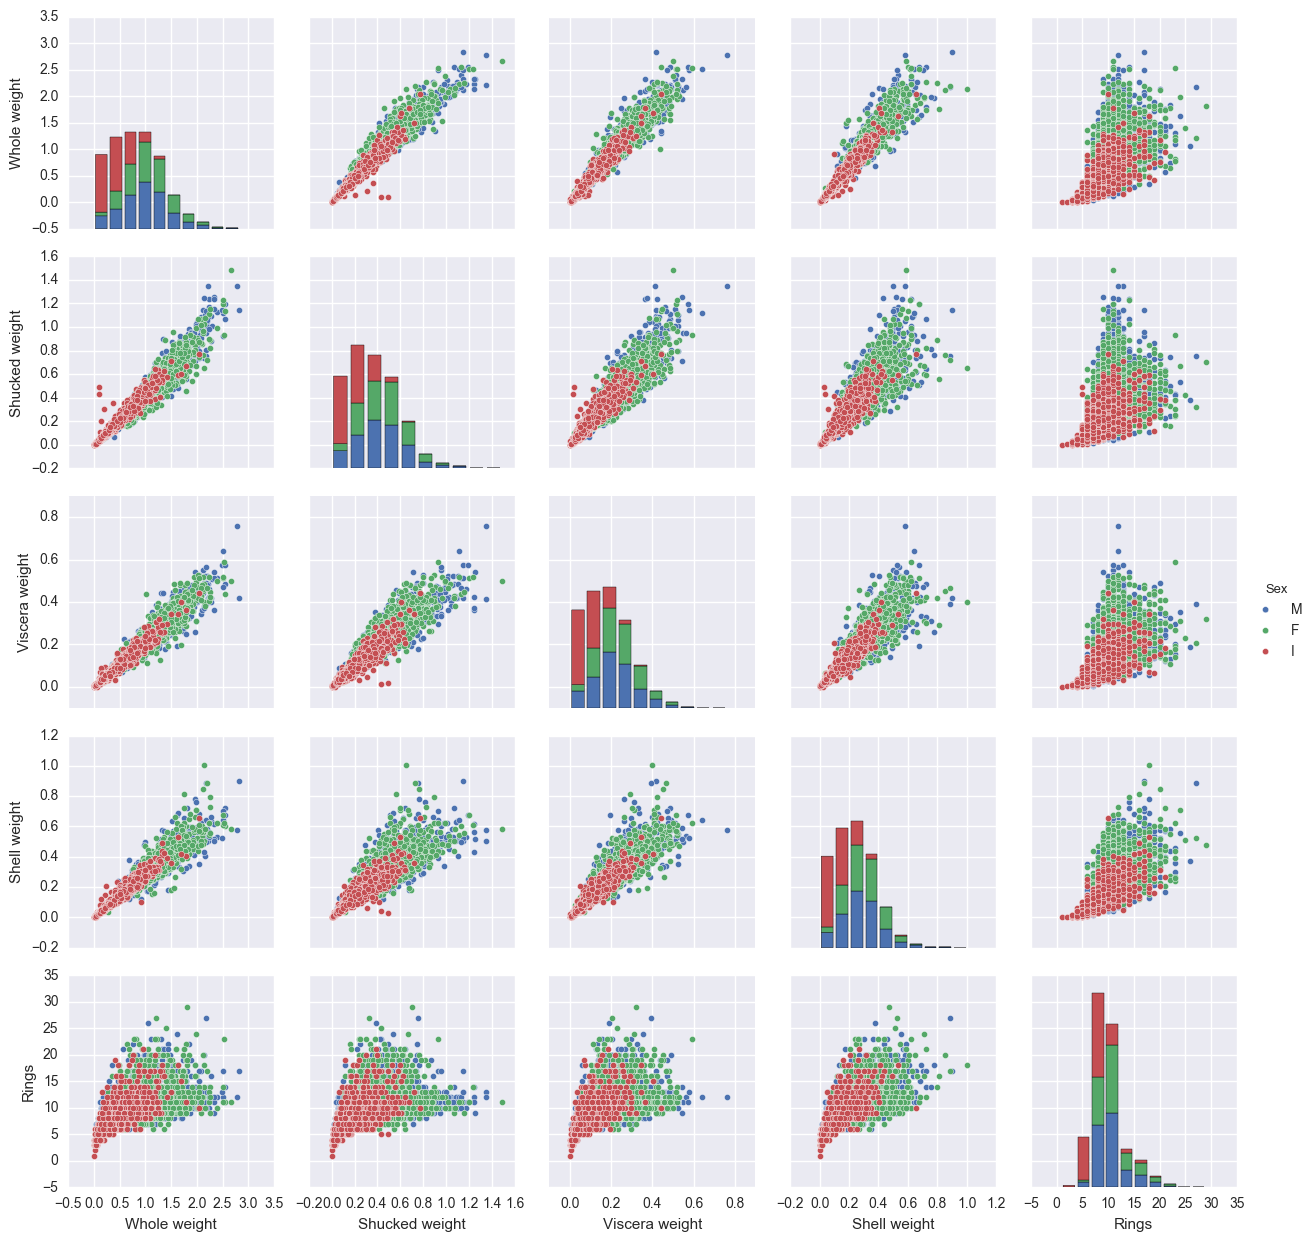

In [58]:
sns.pairplot(Abalone,vars=['Whole weight','Shucked weight',
                              'Viscera weight','Shell weight','Rings']
             ,hue='Sex')

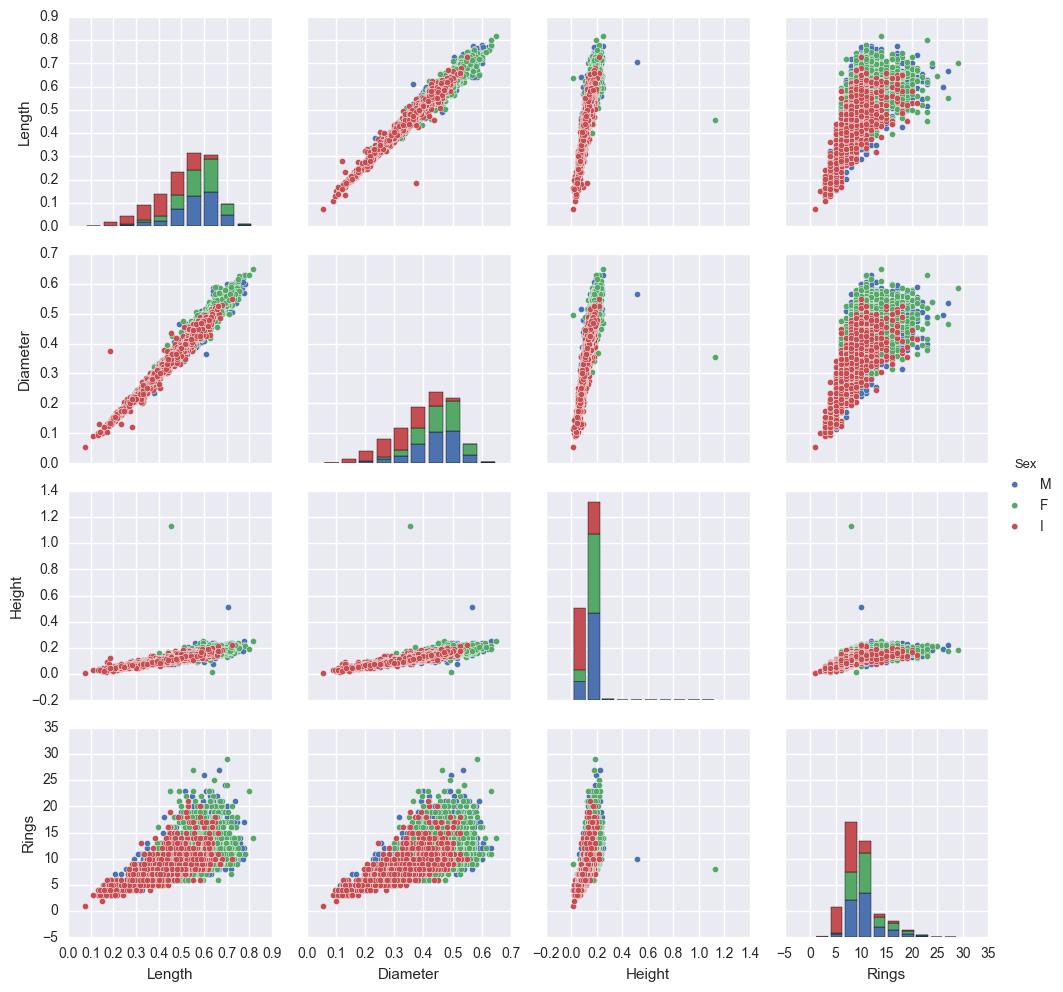

In [59]:
sns.pairplot(Abalone,vars=['Length','Diameter',
                              'Height','Rings'],hue='Sex')

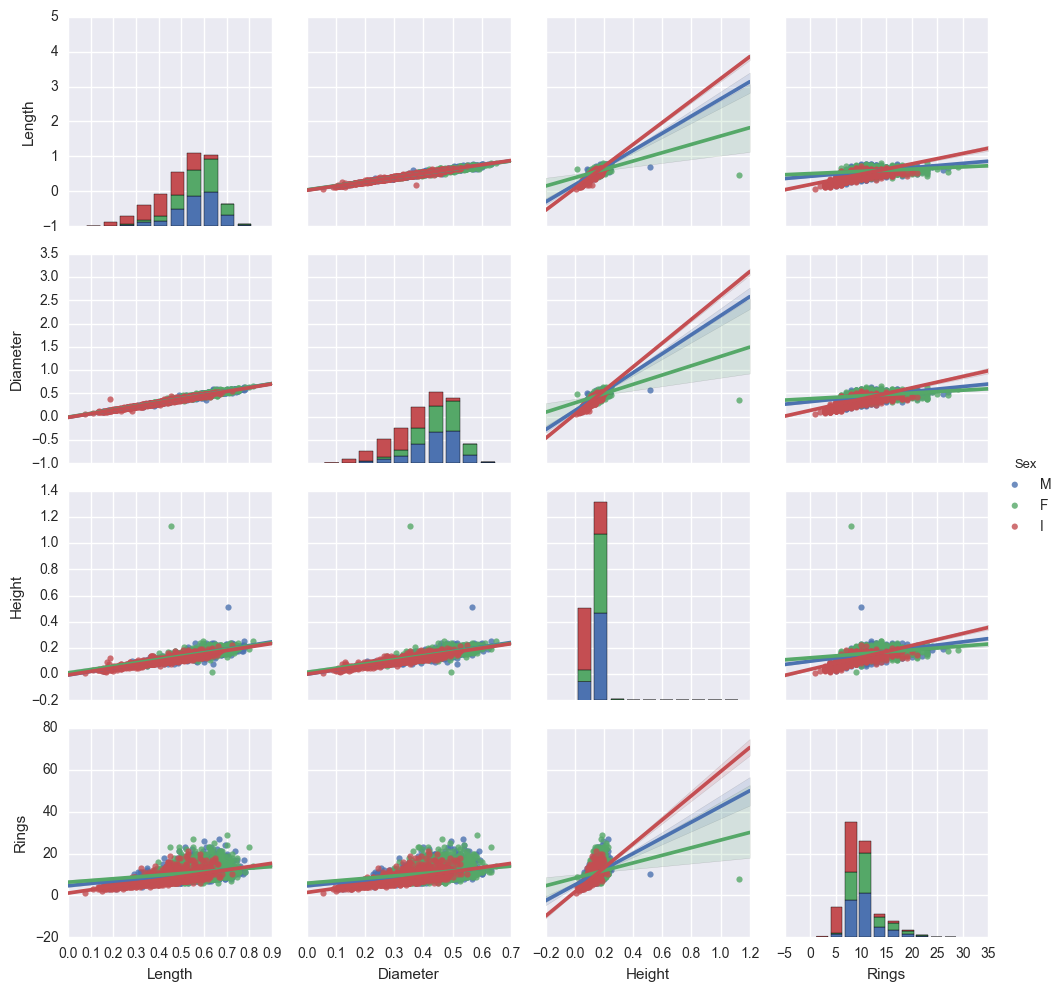

In [60]:
sns.pairplot(Abalone,vars=['Length','Diameter',
                              'Height','Rings'],
             hue='Sex',kind='reg')

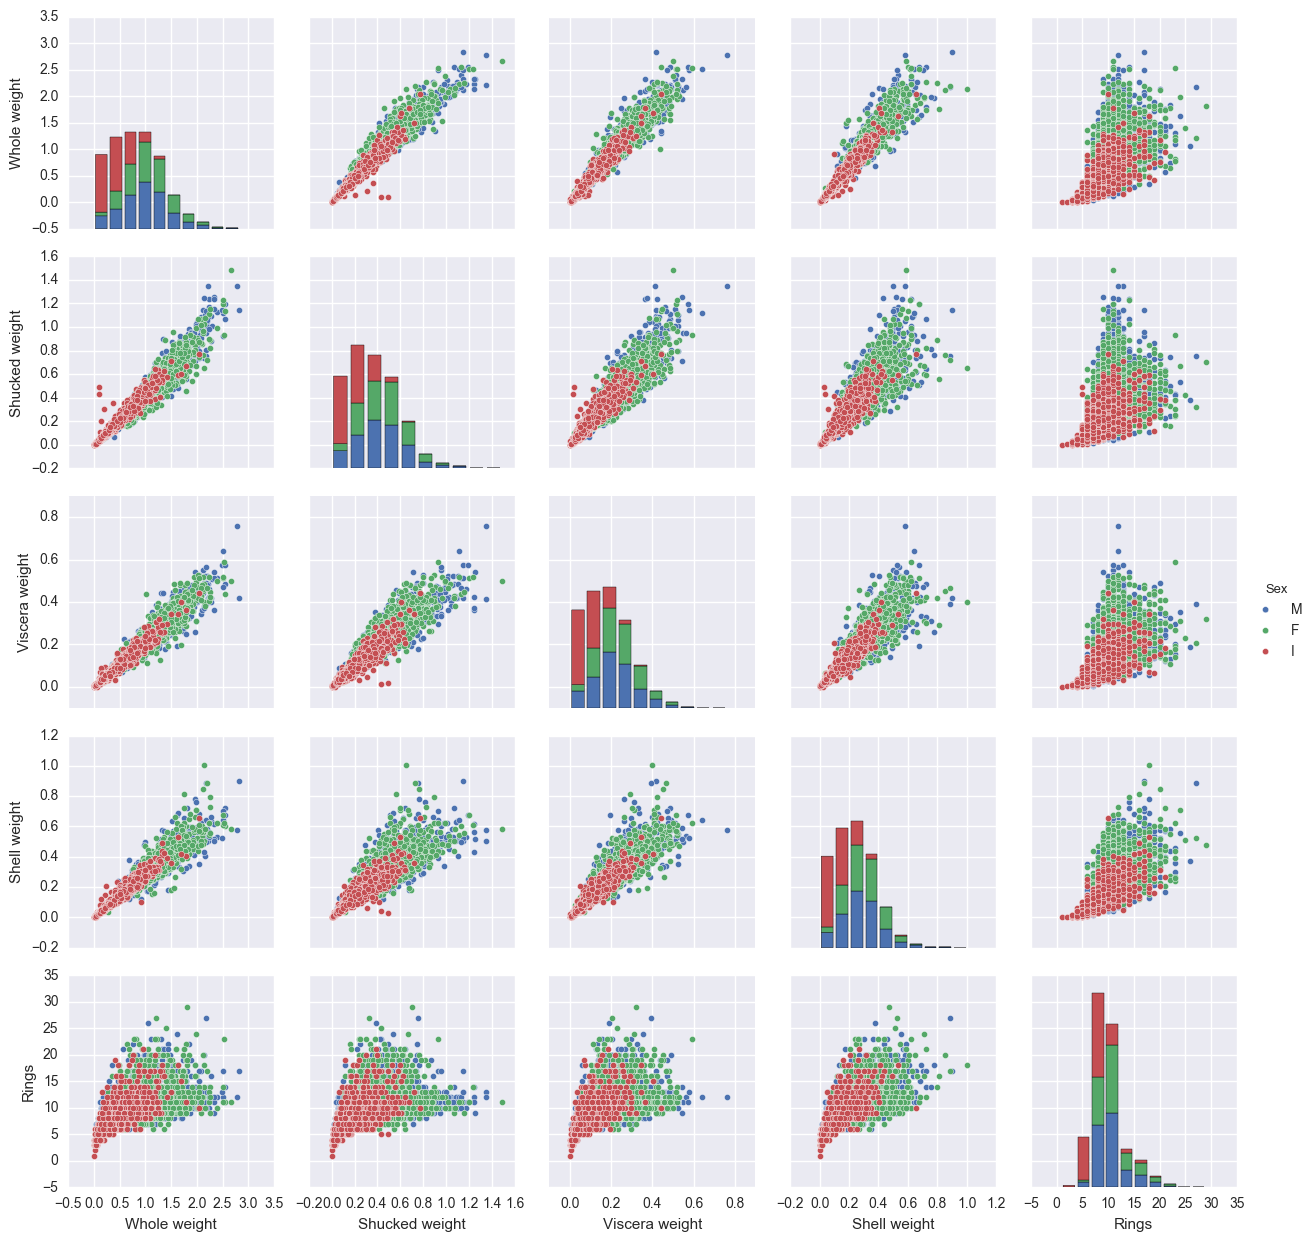

In [61]:
sns.pairplot(Abalone,vars=['Whole weight','Shucked weight',
                              'Viscera weight','Shell weight','Rings']
             ,hue='Sex')

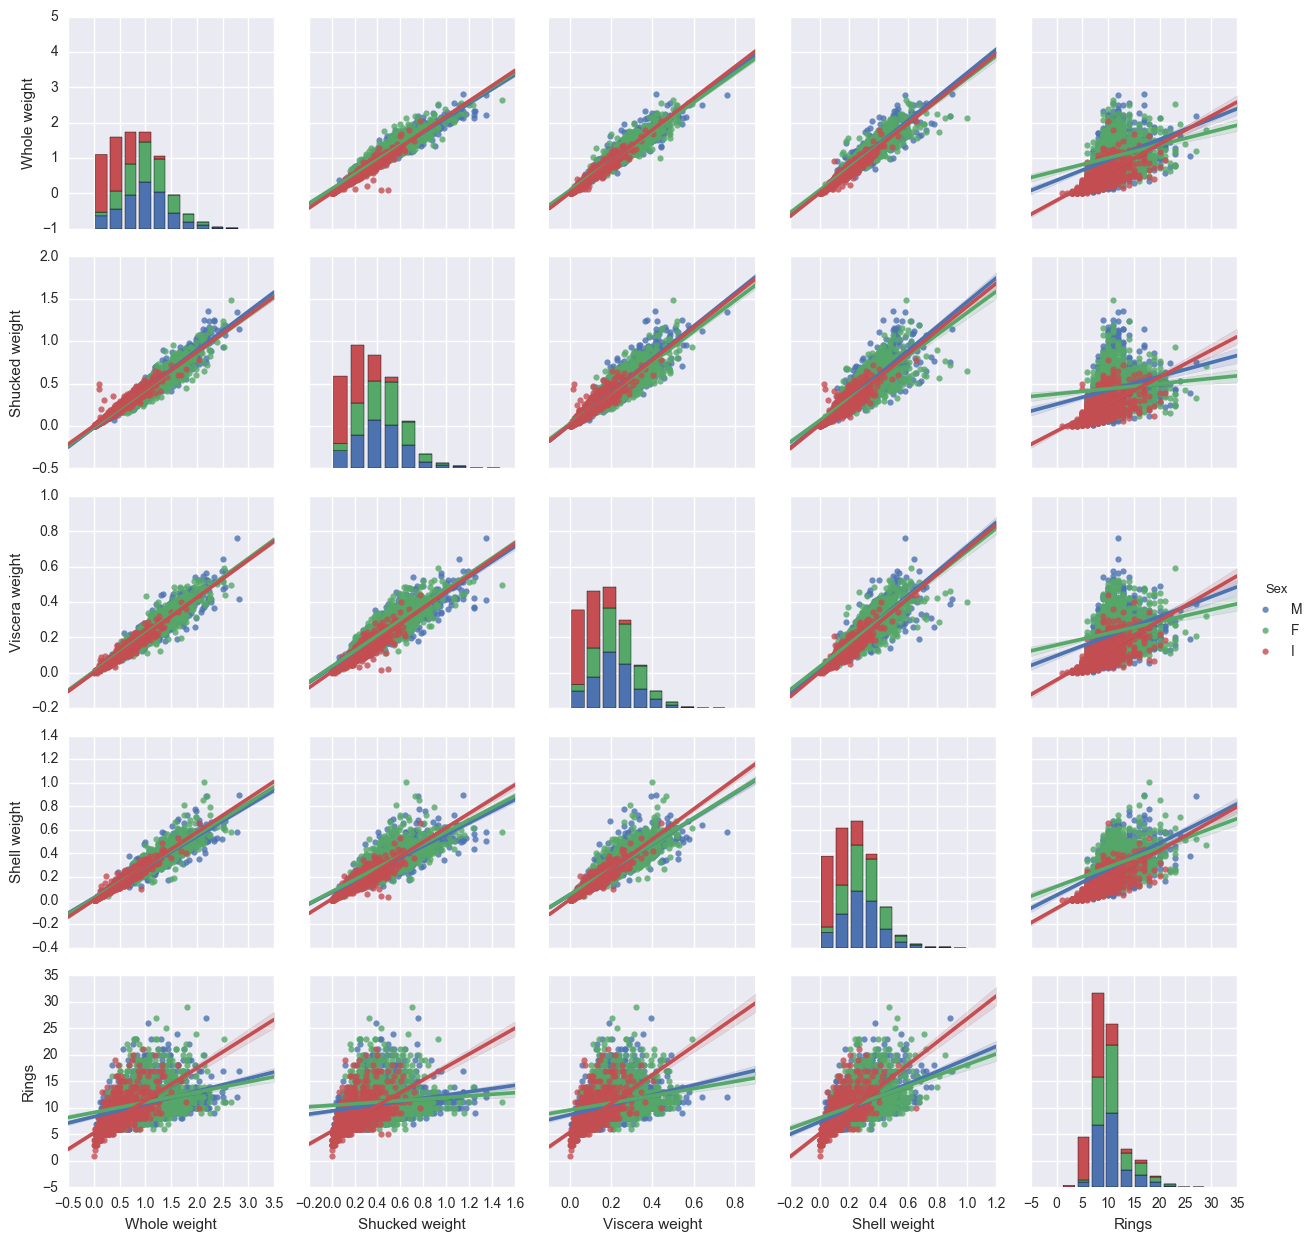

In [62]:
sns.pairplot(Abalone,kind='reg',vars=['Whole weight','Shucked weight',
                              'Viscera weight','Shell weight','Rings']
             ,hue='Sex')

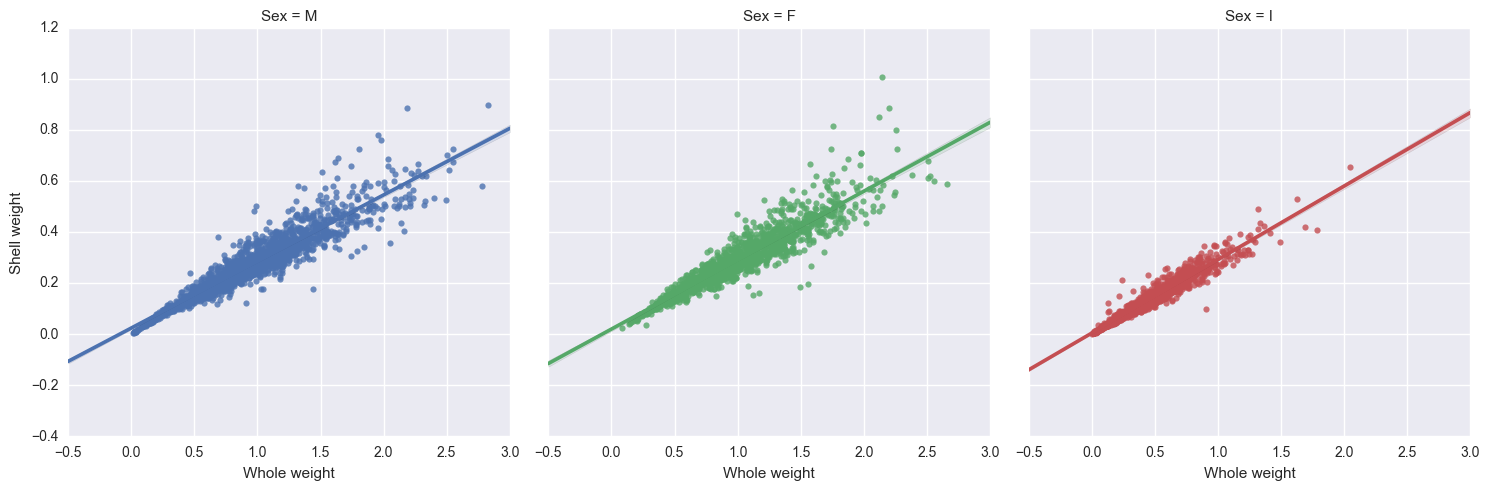

In [63]:
g = sns.lmplot(x="Whole weight", y="Shell weight", hue="Sex",col='Sex',data=Abalone)

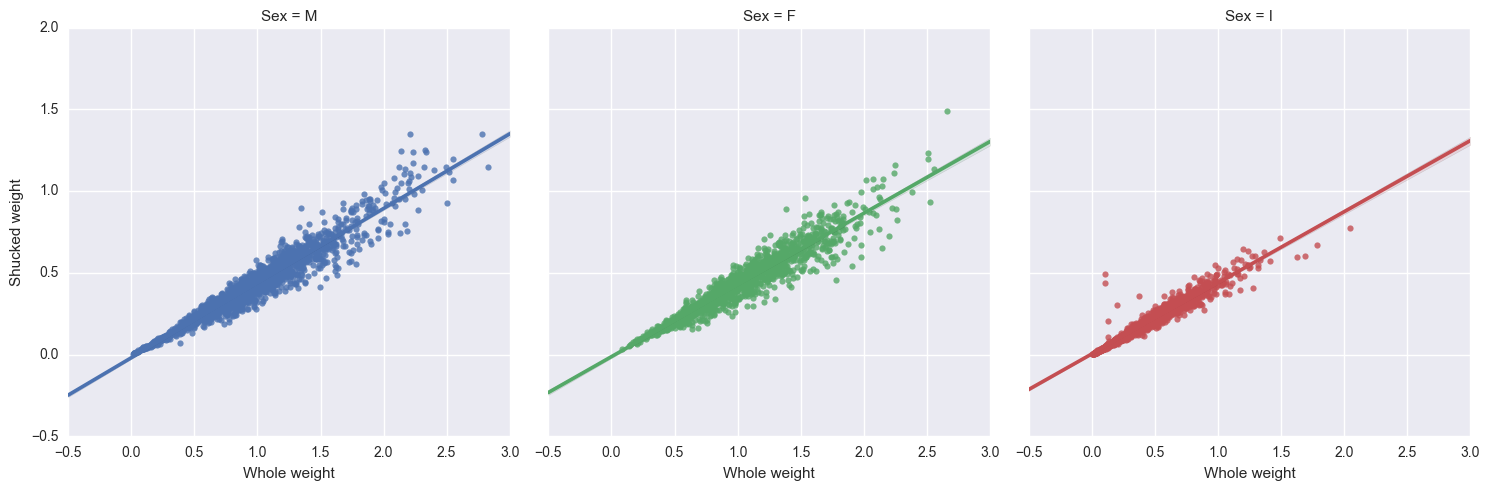

In [64]:
g = sns.lmplot(x="Whole weight", y="Shucked weight", hue="Sex",col='Sex',data=Abalone)

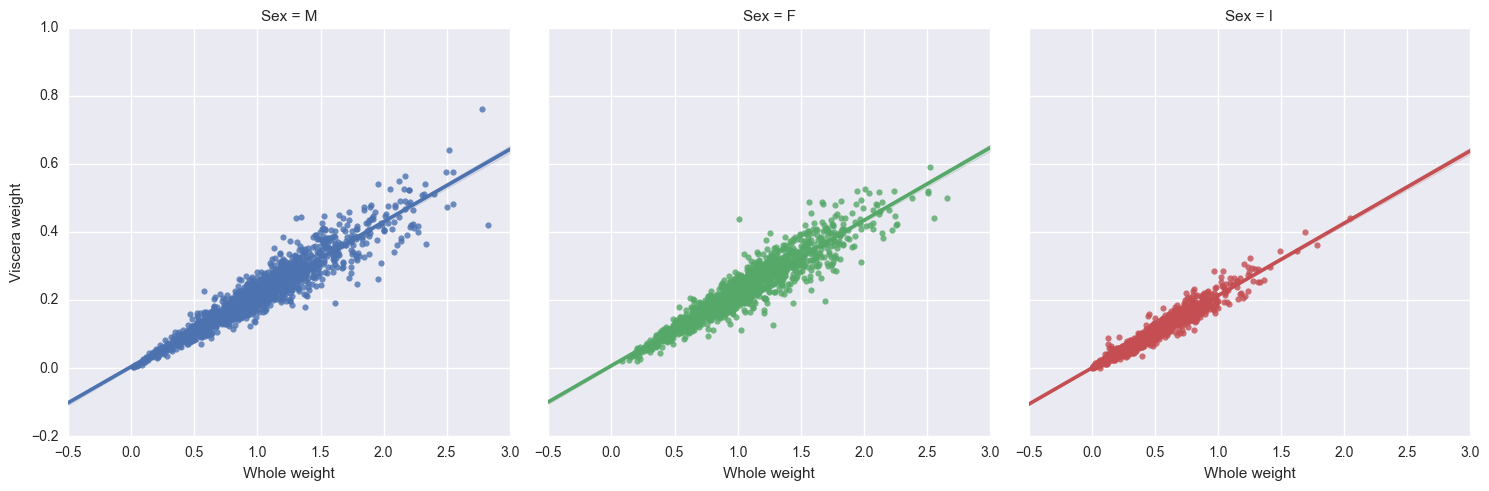

In [65]:
g = sns.lmplot(x="Whole weight", y="Viscera weight", hue="Sex",col='Sex',data=Abalone)

# Seaborn Box Plots 


Using Seaborn Box plot we will Match Rings Agaisnt the Weight different
Classess.

We will Then Use Box Plot to match Rings againt the L \* D \* H

We Will also use FacetGrid to Break boxplots by their Sex.

Reference:

http://seaborn.pydata.org/generated/seaborn.boxplot.html

https://www.bing.com/videos/search?q=how+to+read+Seaborn+Boxplots&qpvt=how+to+read+Seaborn+Boxplots&view=detail&mid=F48C1701BE81E9E5C231F48C1701BE81E9E5C231&FORM=VRDGAR


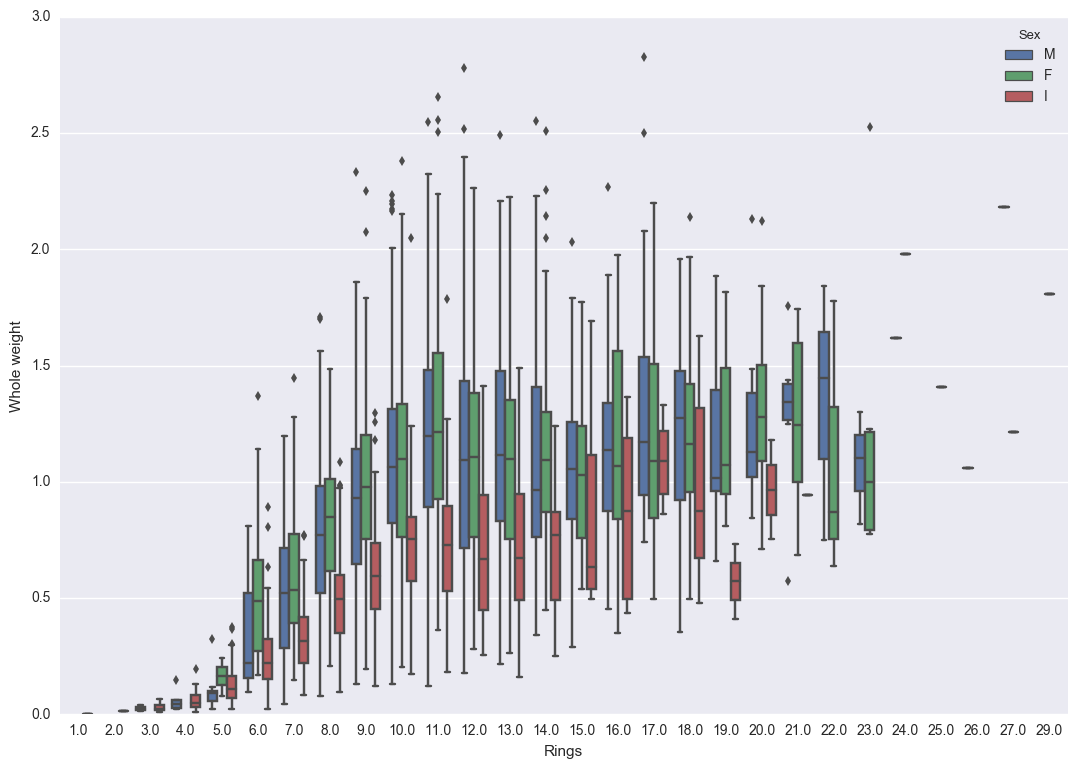

In [66]:
ax = sns.boxplot(x="Rings", y="Whole weight", hue='Sex', data=Abalone)

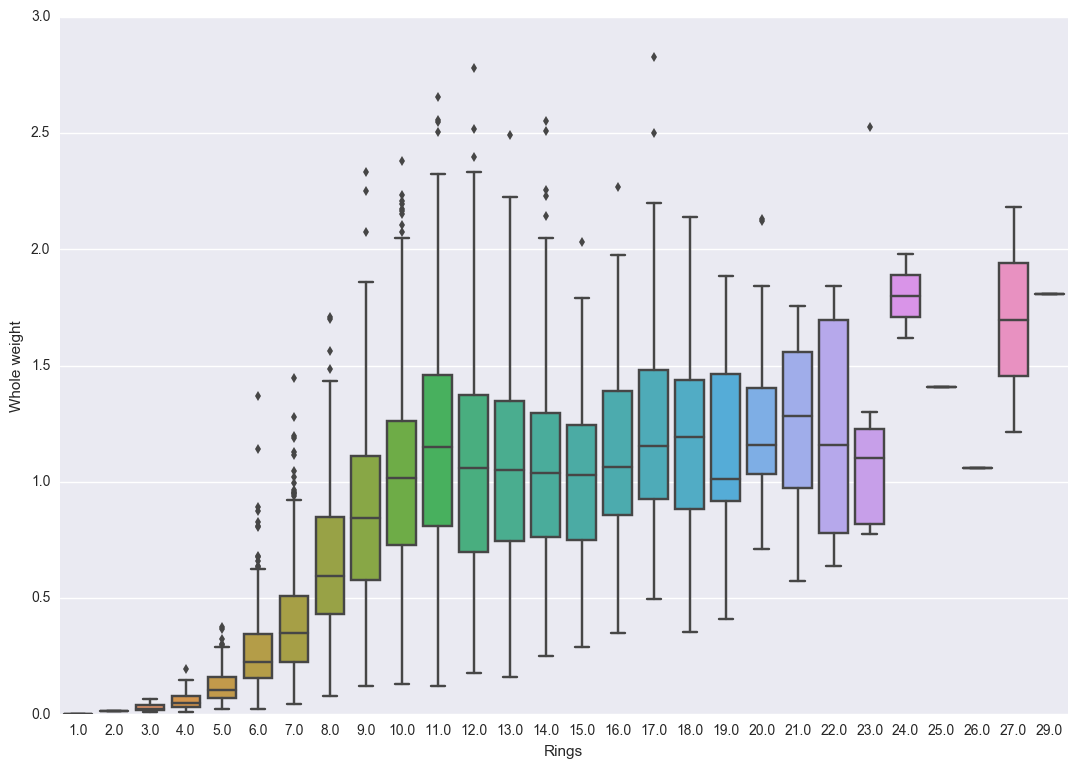

In [67]:
ax = sns.boxplot(x="Rings", y="Whole weight", data=Abalone)

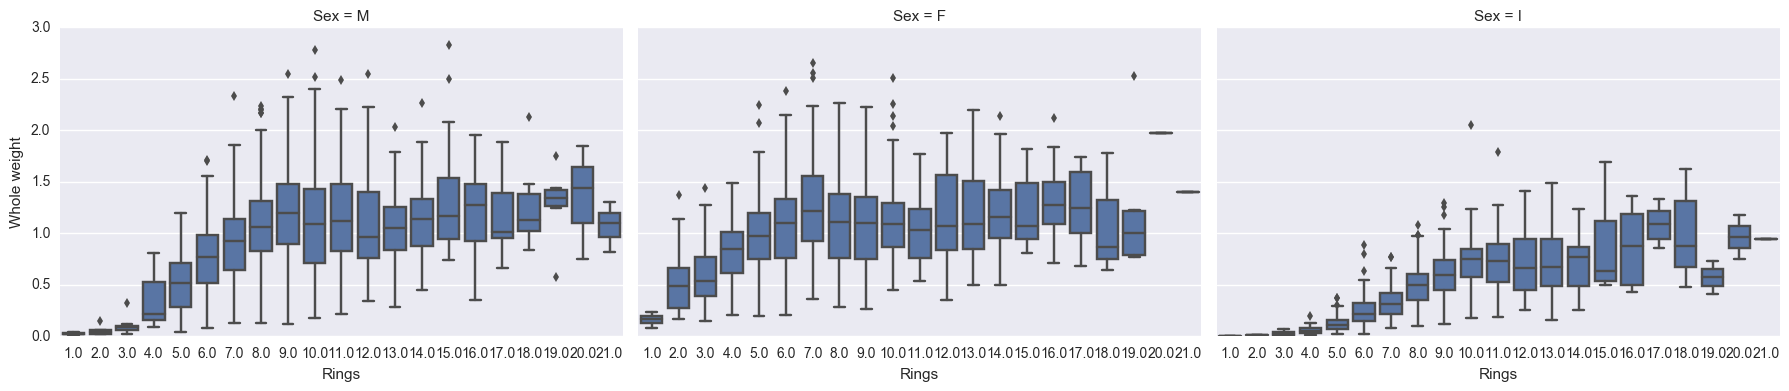

In [68]:
g = sns.FacetGrid(Abalone, col='Sex', size=4, aspect=1.5)
(g.map(sns.boxplot,'Rings','Whole weight')) 

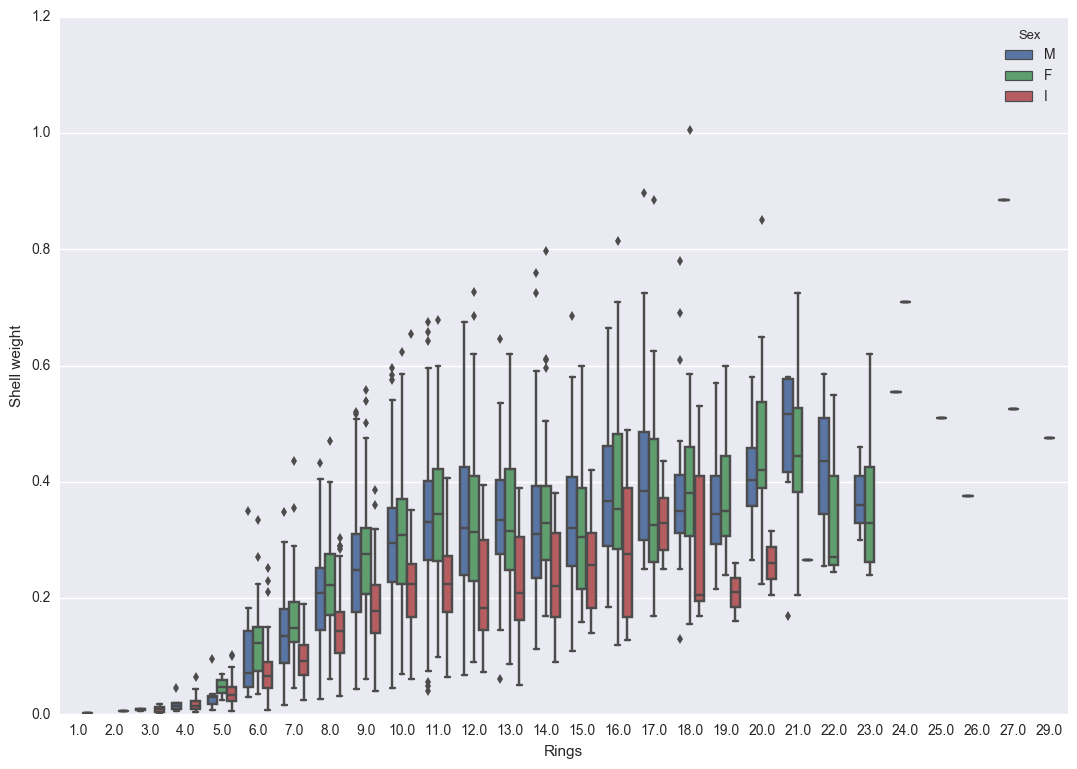

In [69]:
ax = sns.boxplot(x="Rings", y="Shell weight", hue='Sex', data=Abalone)

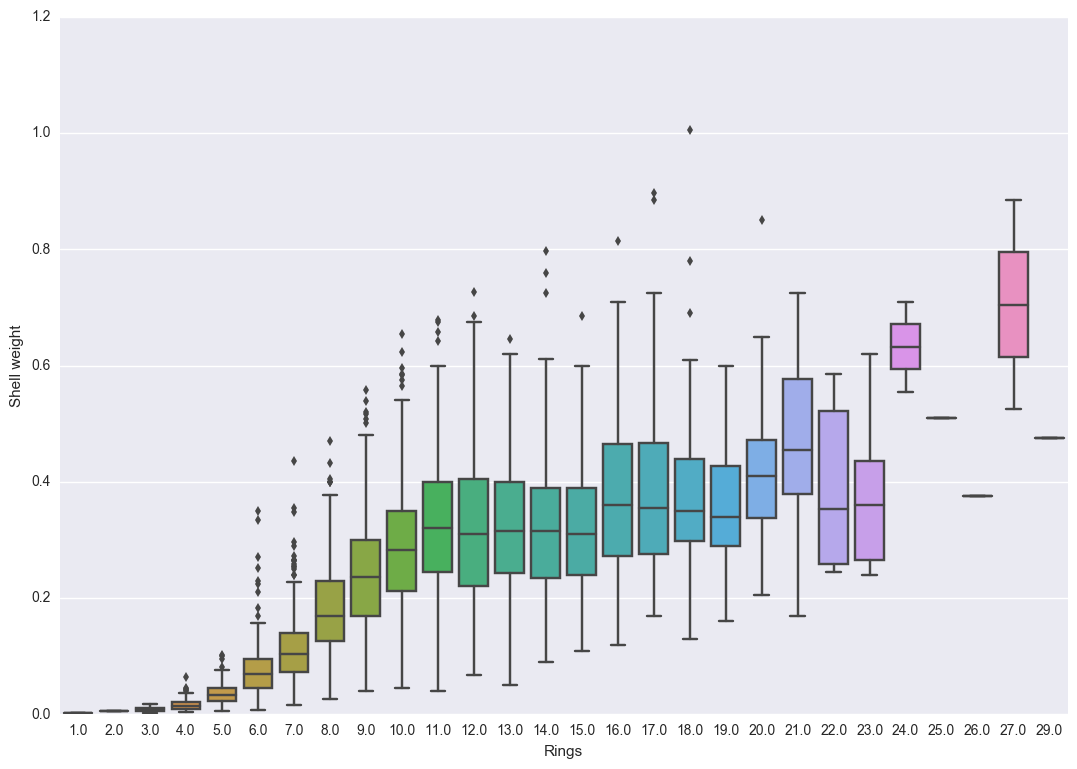

In [70]:
ax = sns.boxplot(x="Rings", y="Shell weight", data=Abalone)

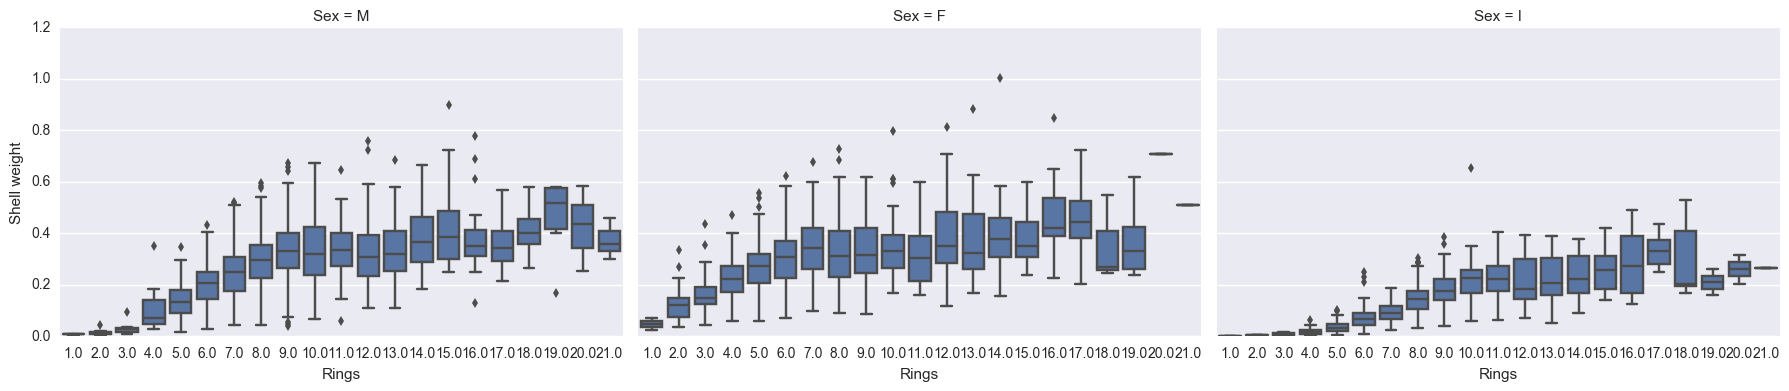

In [71]:
g = sns.FacetGrid(Abalone, col='Sex', size=4, aspect=1.5)
(g.map(sns.boxplot,'Rings','Shell weight')) 

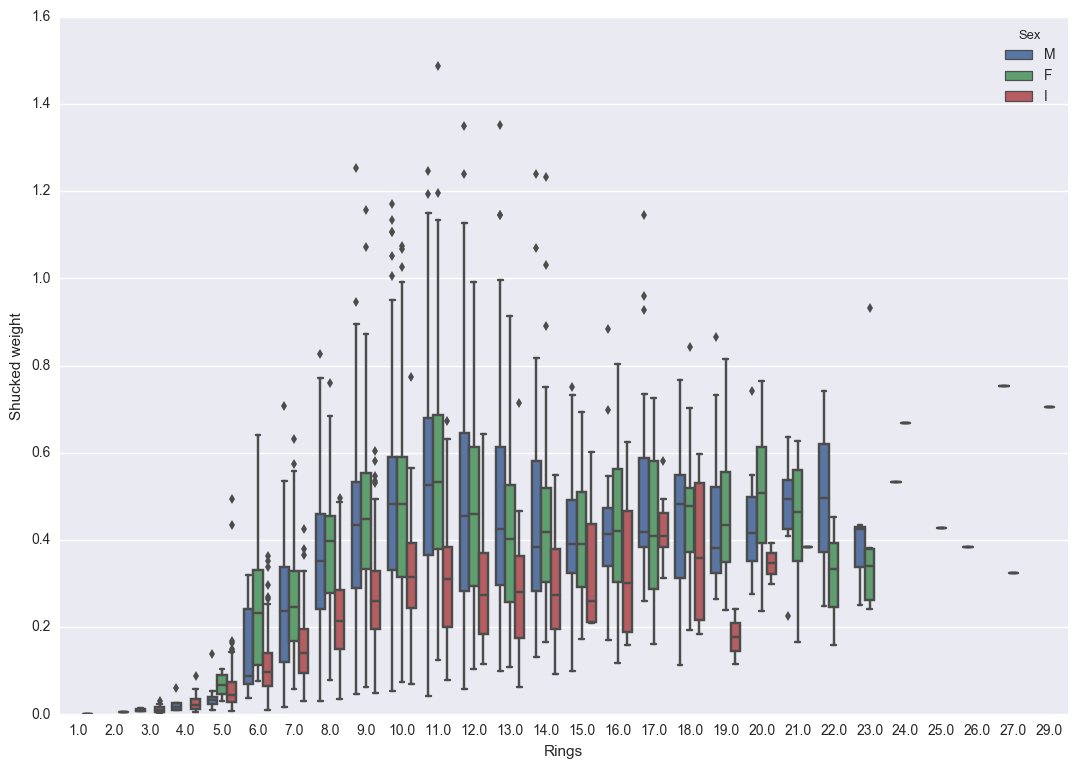

In [72]:
ax = sns.boxplot(x="Rings", y="Shucked weight", hue='Sex', data=Abalone)

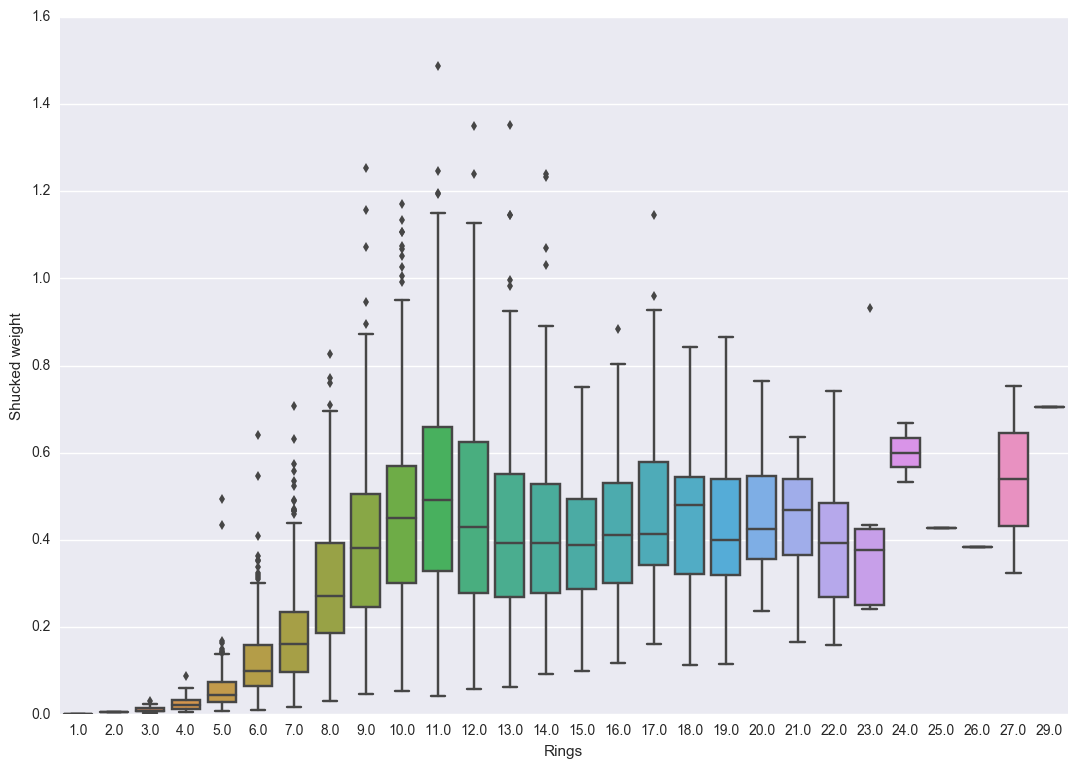

In [73]:
ax = sns.boxplot(x="Rings", y="Shucked weight", data=Abalone)

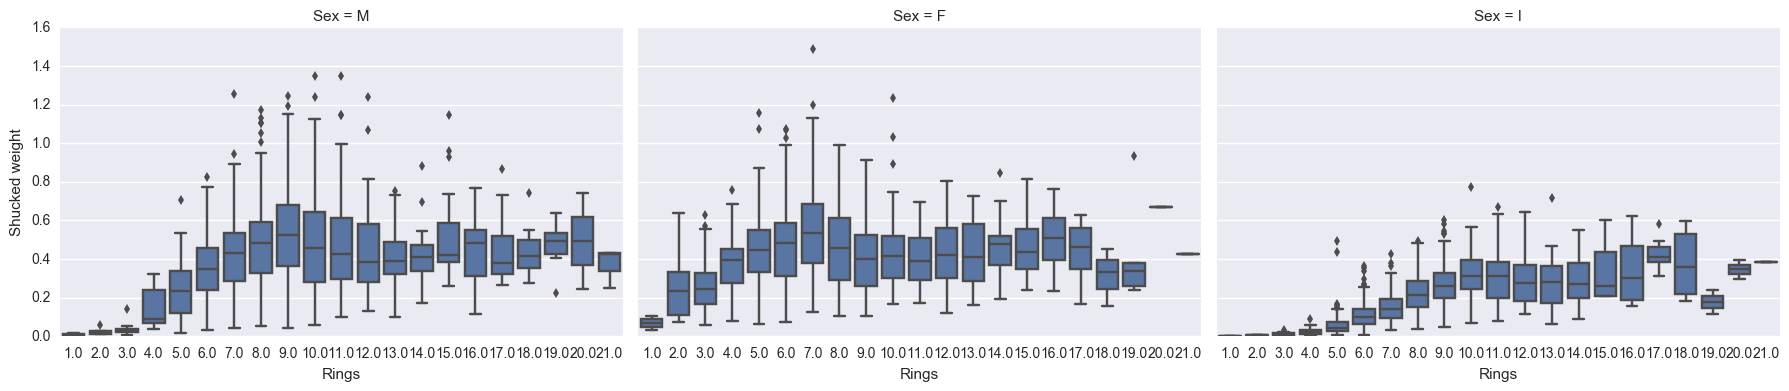

In [ ]:
g = sns.FacetGrid(Abalone, col='Sex', size=4, aspect=1.5)
(g.map(sns.boxplot,'Rings','Shucked weight')) 

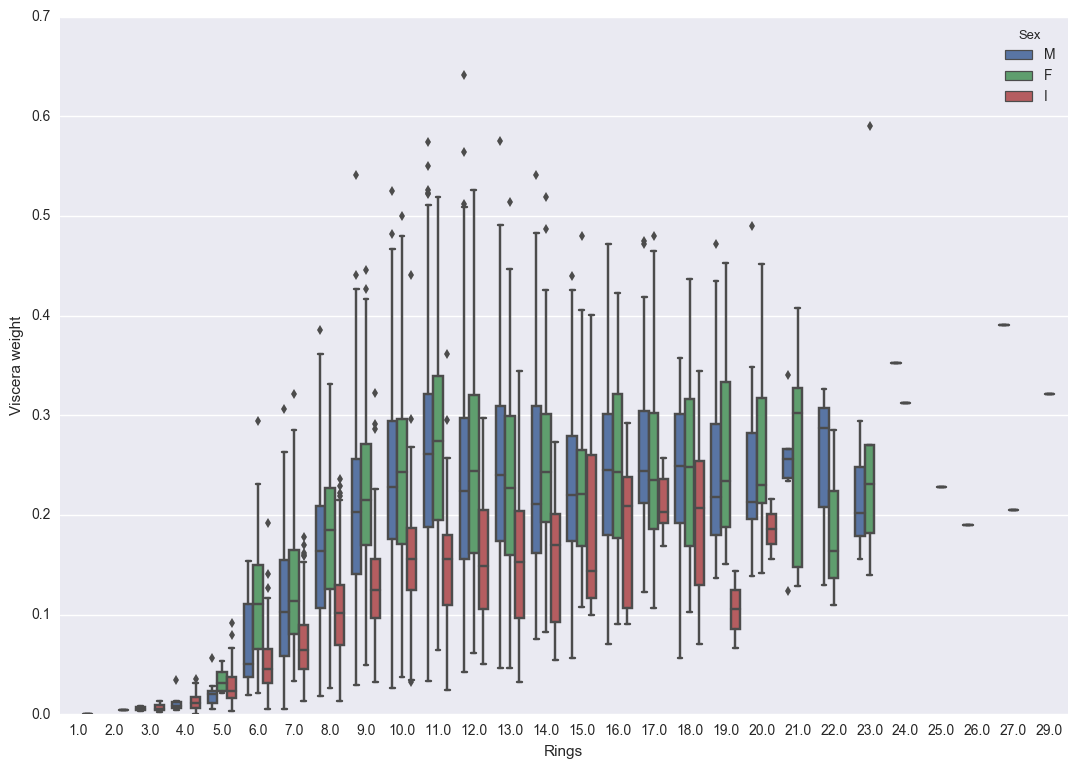

In [215]:
ax = sns.boxplot(x="Rings", y="Viscera weight", hue='Sex', data=Abalone)

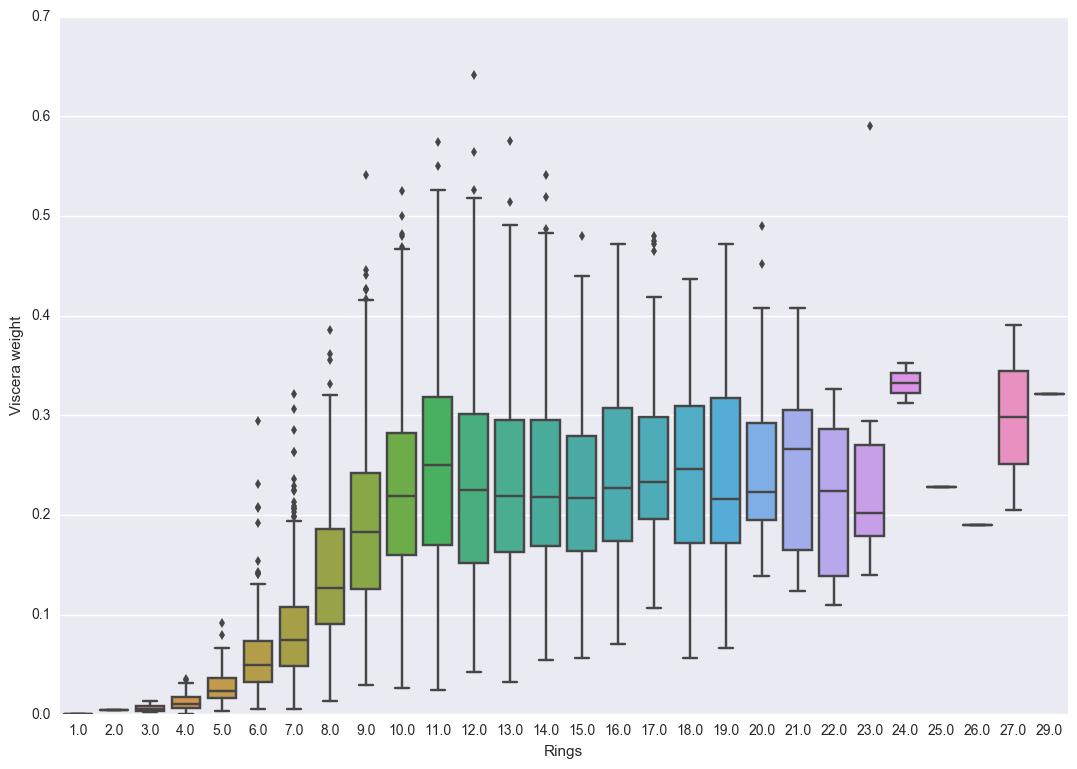

In [216]:
ax = sns.boxplot(x="Rings", y="Viscera weight", data=Abalone)

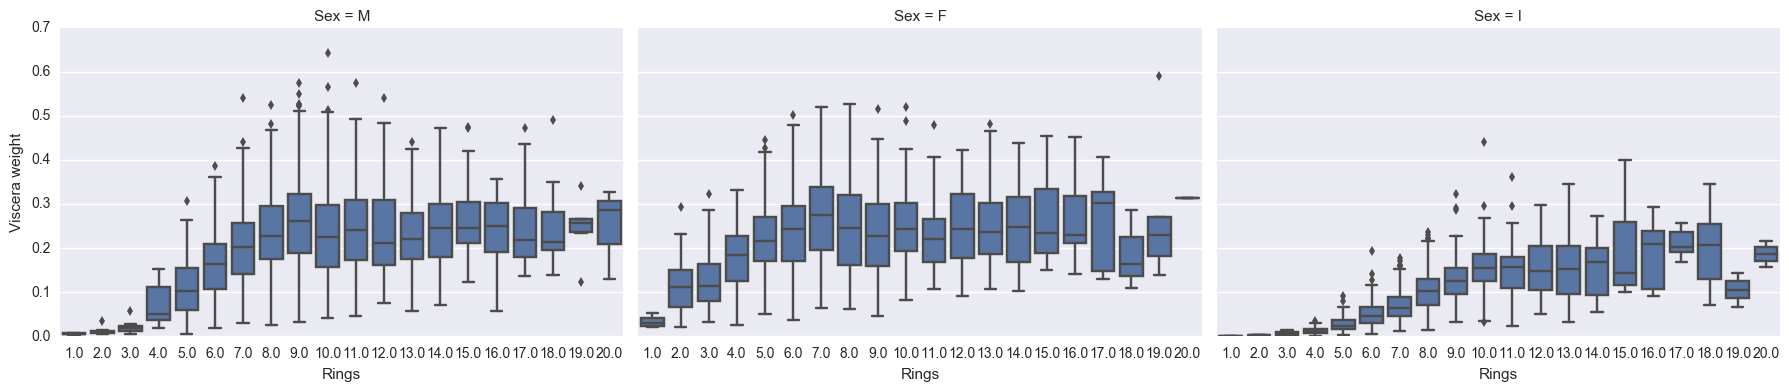

In [217]:
g = sns.FacetGrid(Abalone, col='Sex', size=4, aspect=1.5)
(g.map(sns.boxplot,'Rings','Viscera weight')) 

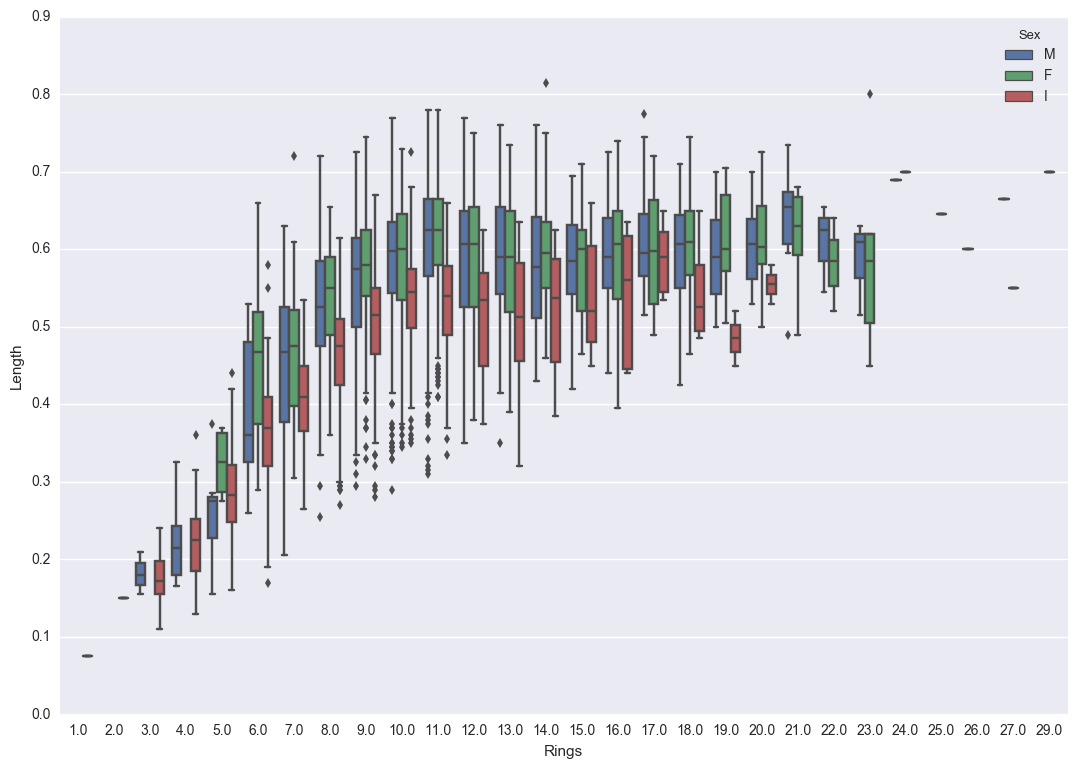

In [218]:
ax = sns.boxplot(x="Rings", y="Length", hue='Sex', data=Abalone)

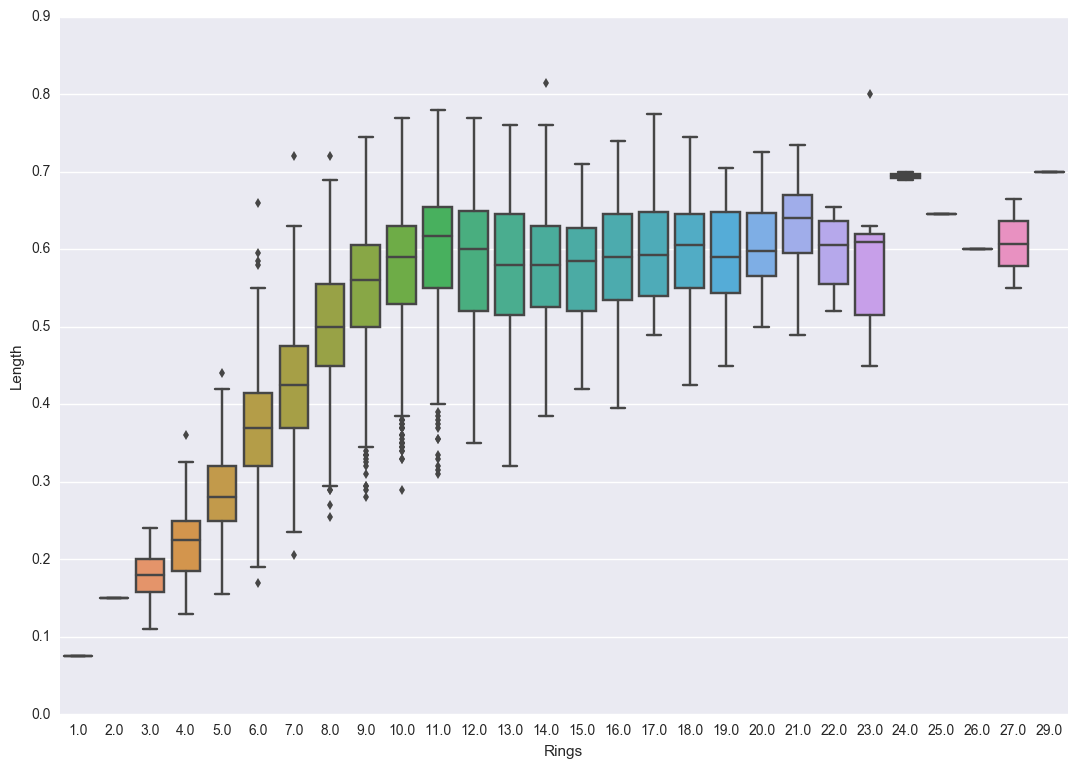

In [219]:
ax = sns.boxplot(x="Rings", y="Length", data=Abalone)

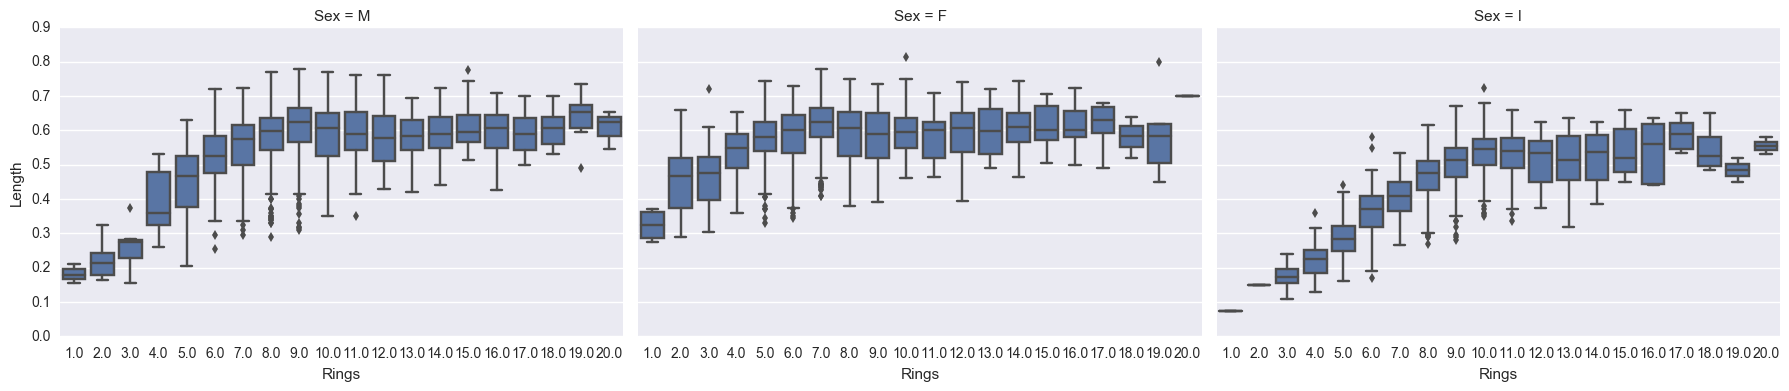

In [220]:
g = sns.FacetGrid(Abalone, col='Sex', size=4, aspect=1.5)
(g.map(sns.boxplot,'Rings','Length')) 

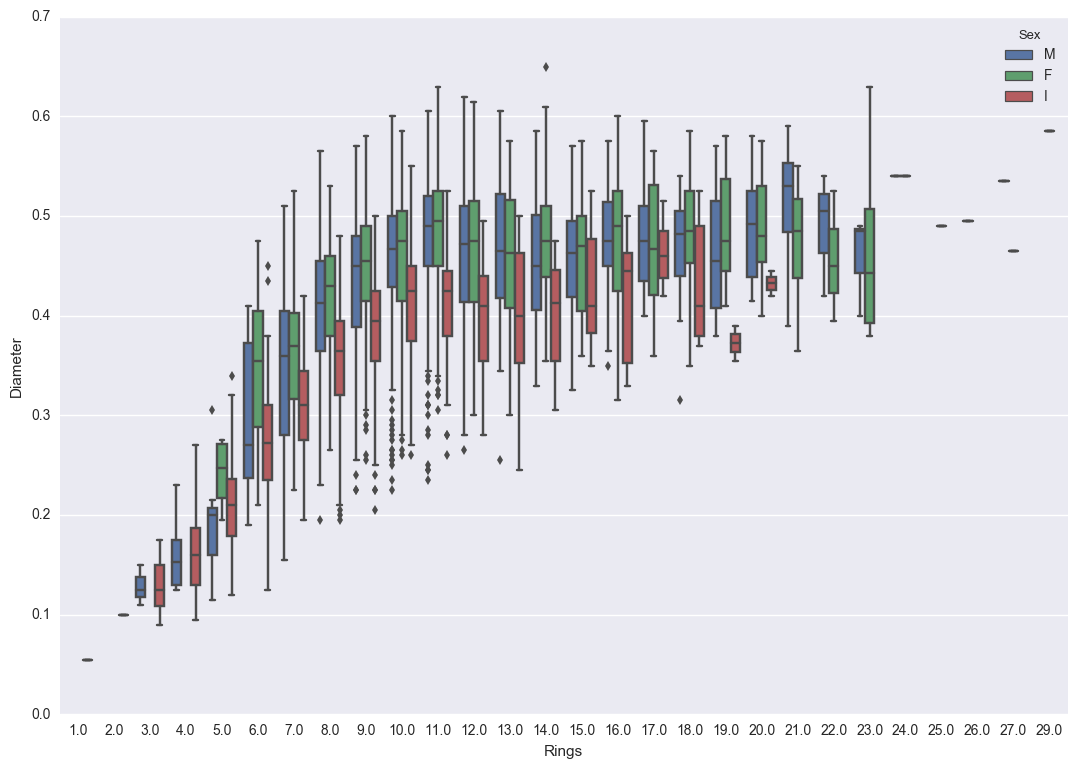

In [221]:
ax = sns.boxplot(x="Rings", y="Diameter", hue='Sex', data=Abalone)

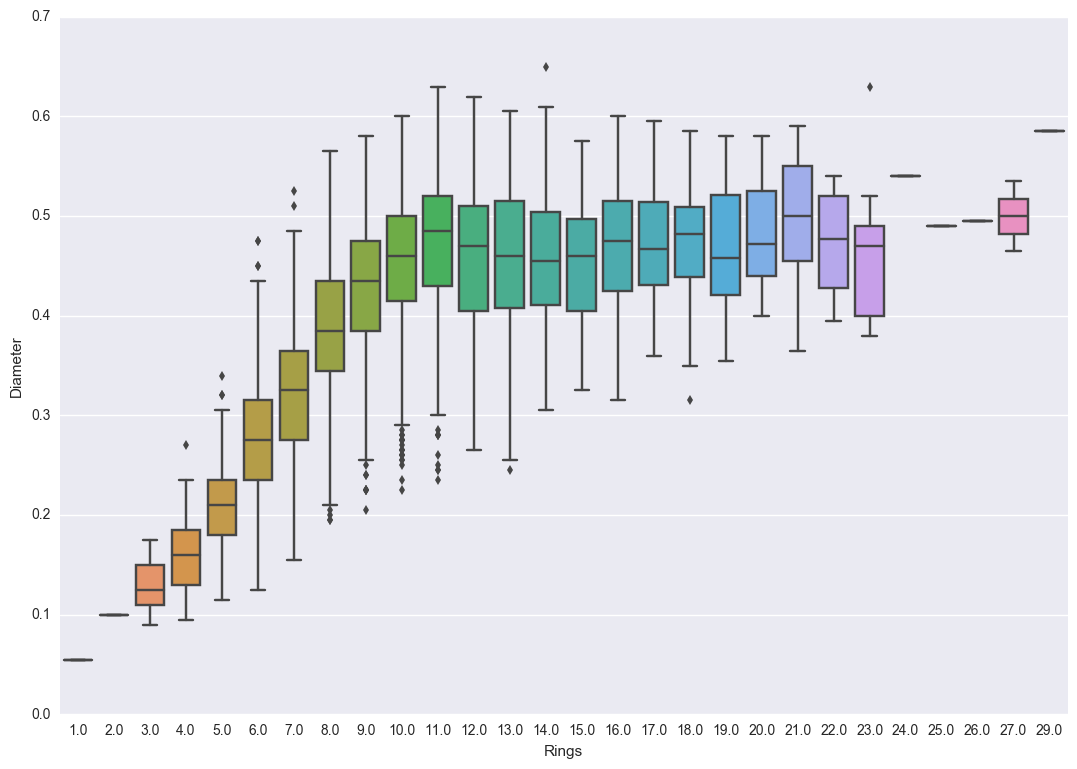

In [222]:
ax = sns.boxplot(x="Rings", y="Diameter", data=Abalone)

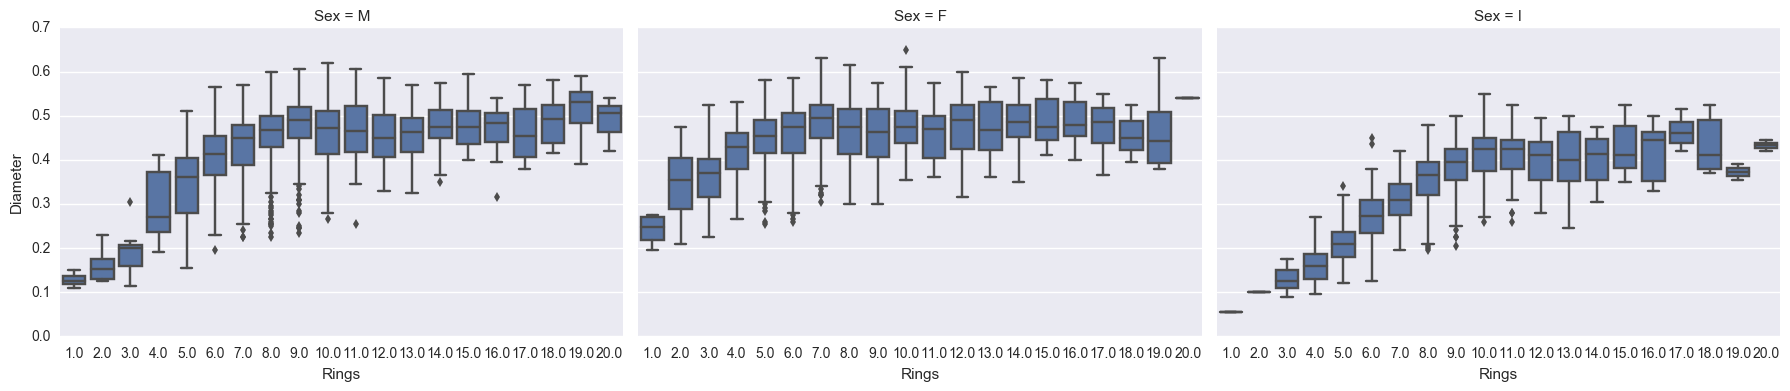

In [223]:
g = sns.FacetGrid(Abalone, col='Sex', size=4, aspect=1.5)
(g.map(sns.boxplot,'Rings','Diameter')) 

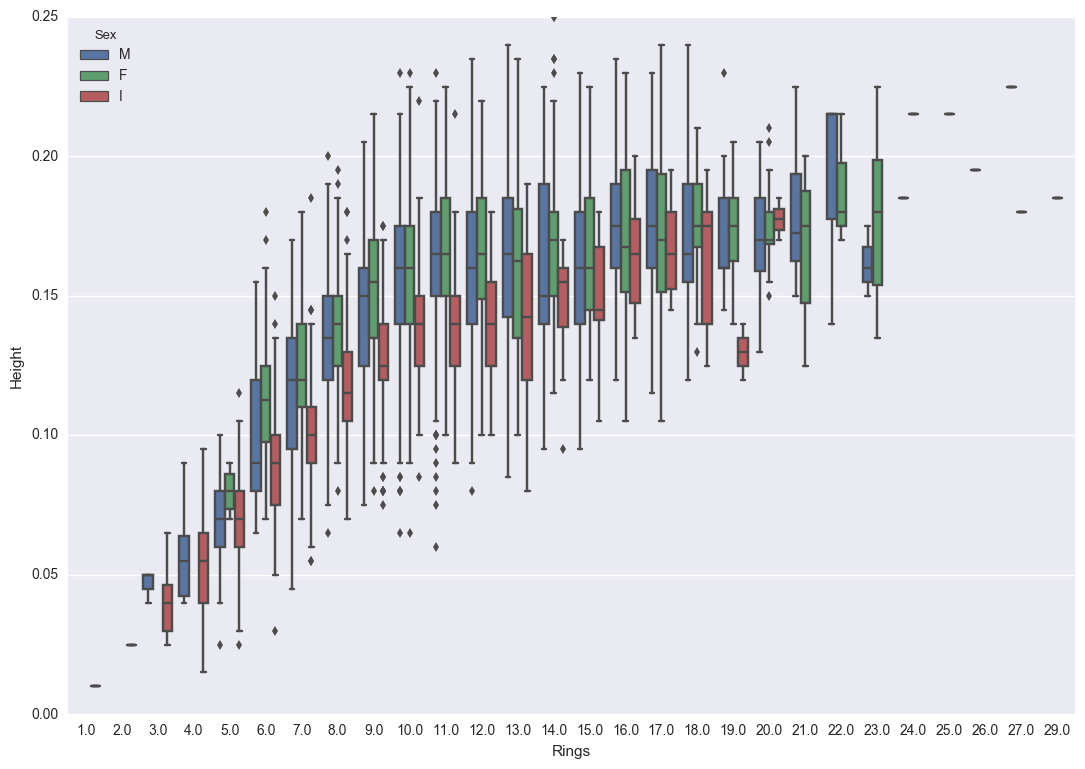

In [224]:
ax = sns.boxplot(x="Rings", y="Height", hue='Sex', data=Abalone)

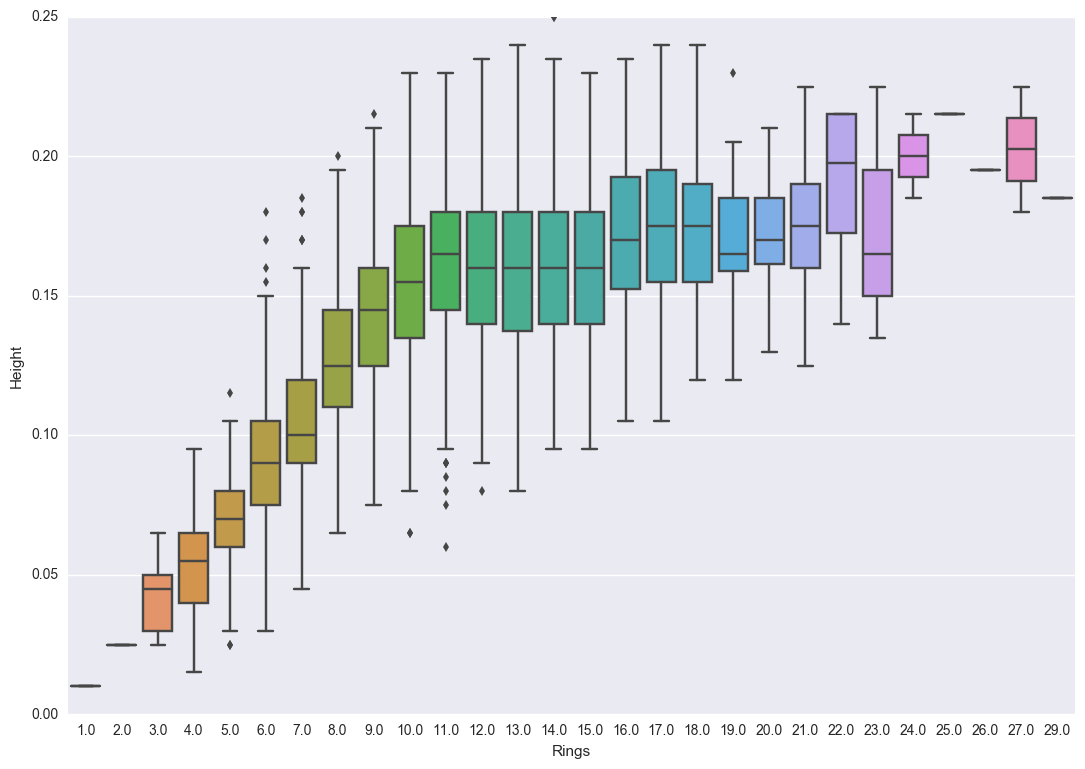

In [225]:
ax = sns.boxplot(x="Rings", y="Height", data=Abalone)

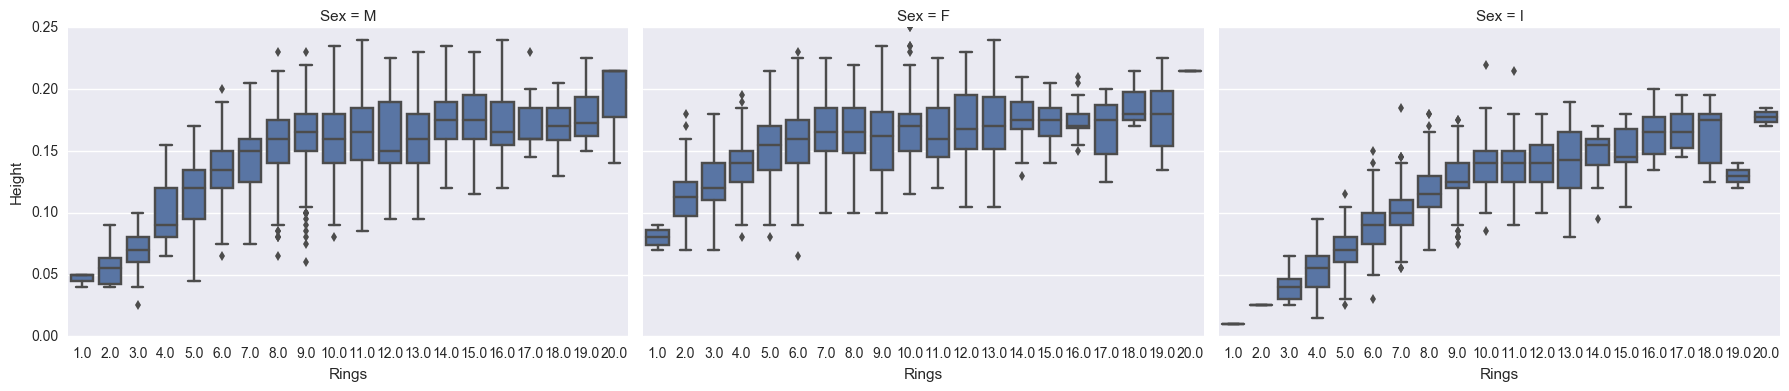

In [226]:
g = sns.FacetGrid(Abalone, col='Sex', size=4, aspect=1.5)
(g.map(sns.boxplot,'Rings','Height')) 

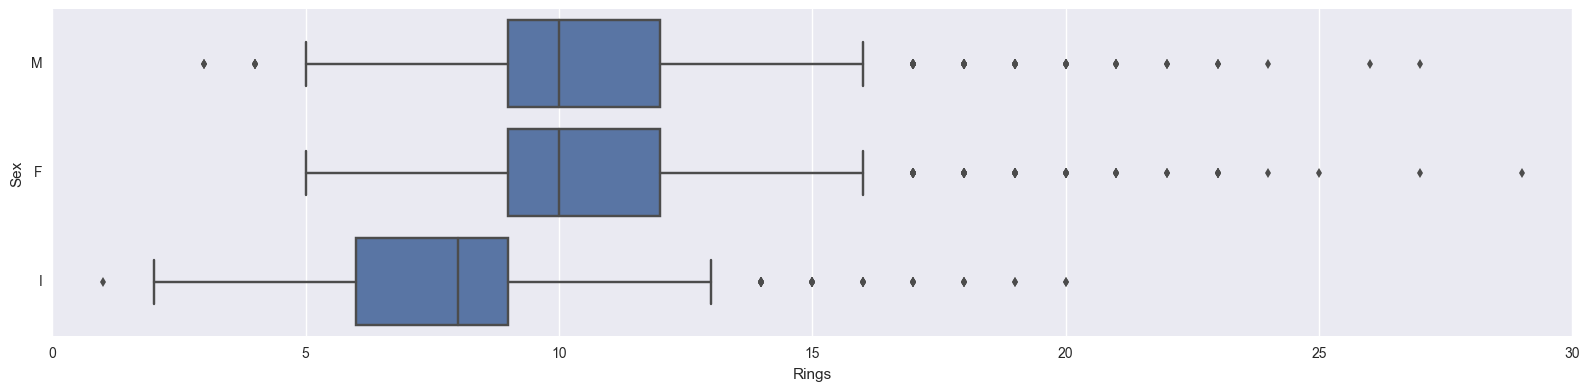

In [227]:
g = sns.FacetGrid(Abalone, size=4, aspect=4)
(g.map(sns.boxplot,'Rings','Sex'))

.

# Histogram

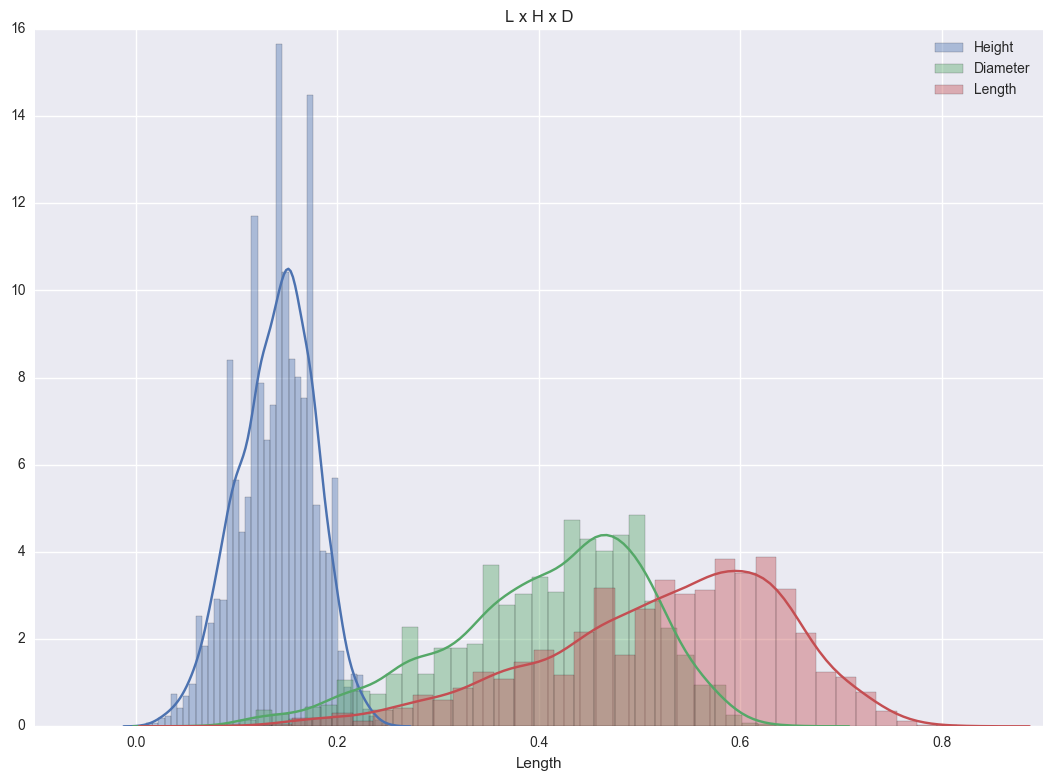

In [228]:
Height = Abalone['Height']
Diameter = Abalone['Diameter']
Length =  Abalone['Length']

sns.distplot(Height, label='Height')
sns.distplot(Diameter, label='Diameter')
sns.distplot(Length, label='Length')
plt.title('L x H x D')
plt.legend() 
plt.show()



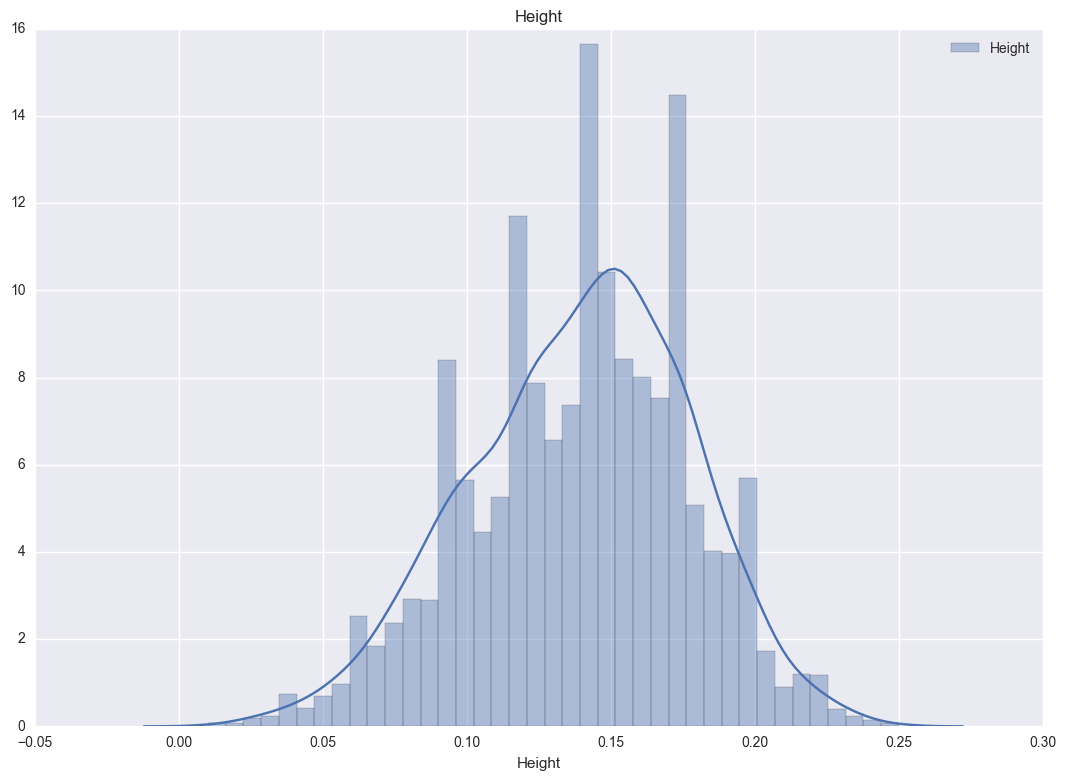

In [229]:
Height = Abalone['Height']
sns.distplot(Height, label='Height')
plt.title('Height')
plt.legend() 
plt.show()

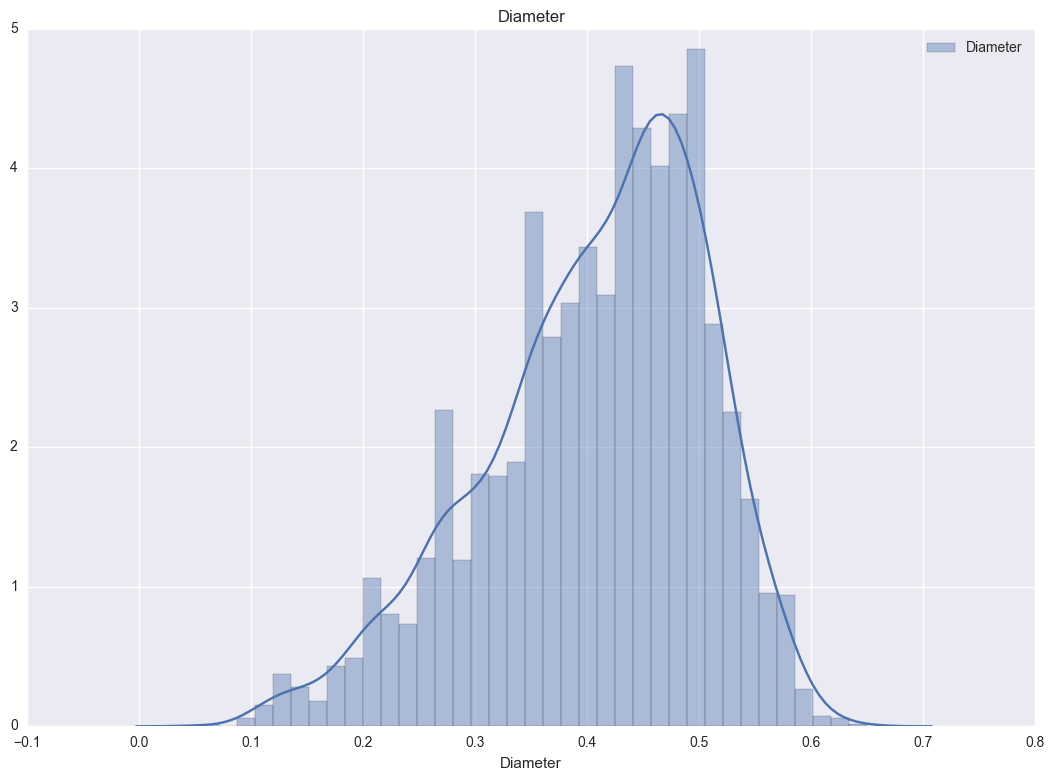

In [230]:
Diameter = Abalone['Diameter']
sns.distplot(Diameter, label='Diameter')
plt.title('Diameter')
plt.legend() 
plt.show()

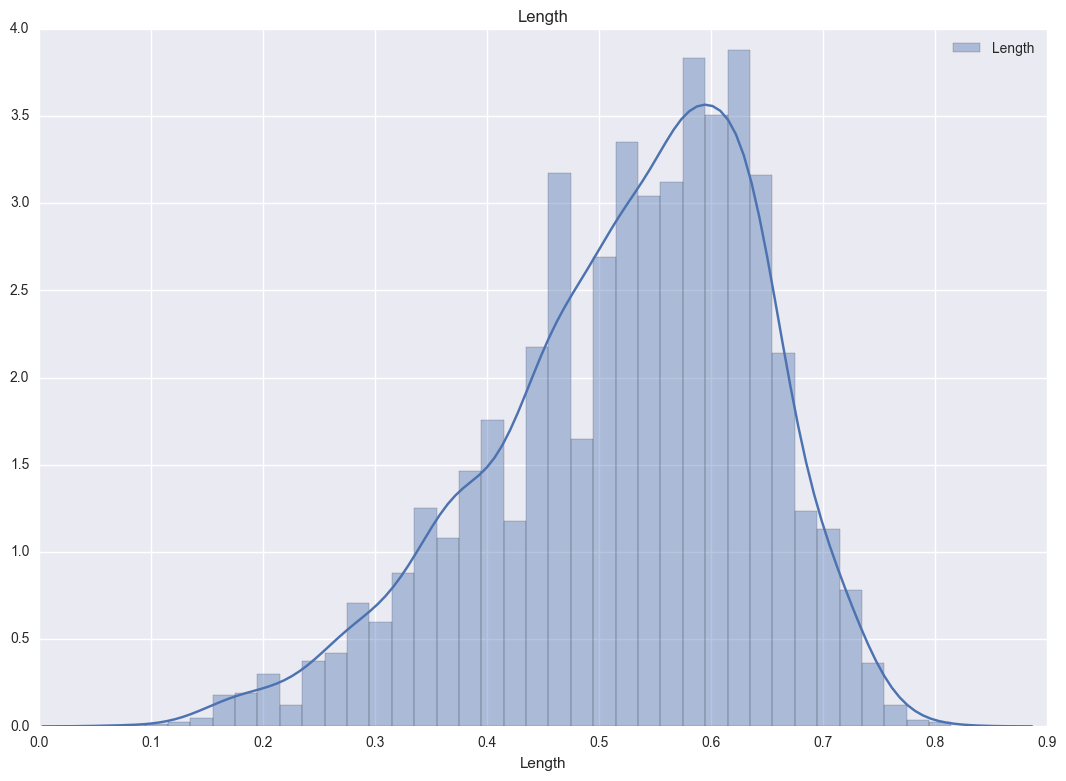

In [231]:
Length = Abalone['Length']
sns.distplot(Length, label='Length')
plt.title('Length')
plt.legend() 
plt.show()

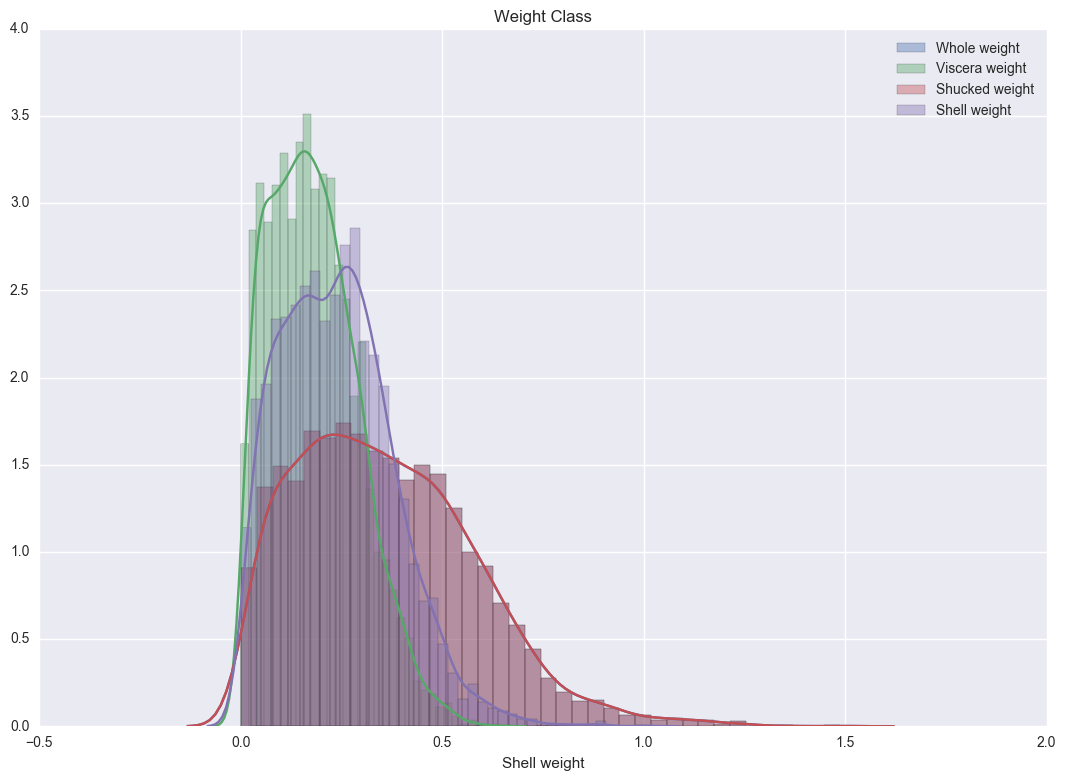

In [232]:
Shell = Abalone['Shell weight']
Shucked = Abalone['Shucked weight']
Viscera = Abalone['Viscera weight']
Whole = Abalone['Whole weight']
sns.distplot(Shucked, label='Whole weight')
sns.distplot(Viscera, label='Viscera weight')
sns.distplot(Shucked, label='Shucked weight')
sns.distplot(Shell, label='Shell weight')
plt.title('Weight Class')
plt.legend() 
plt.show()

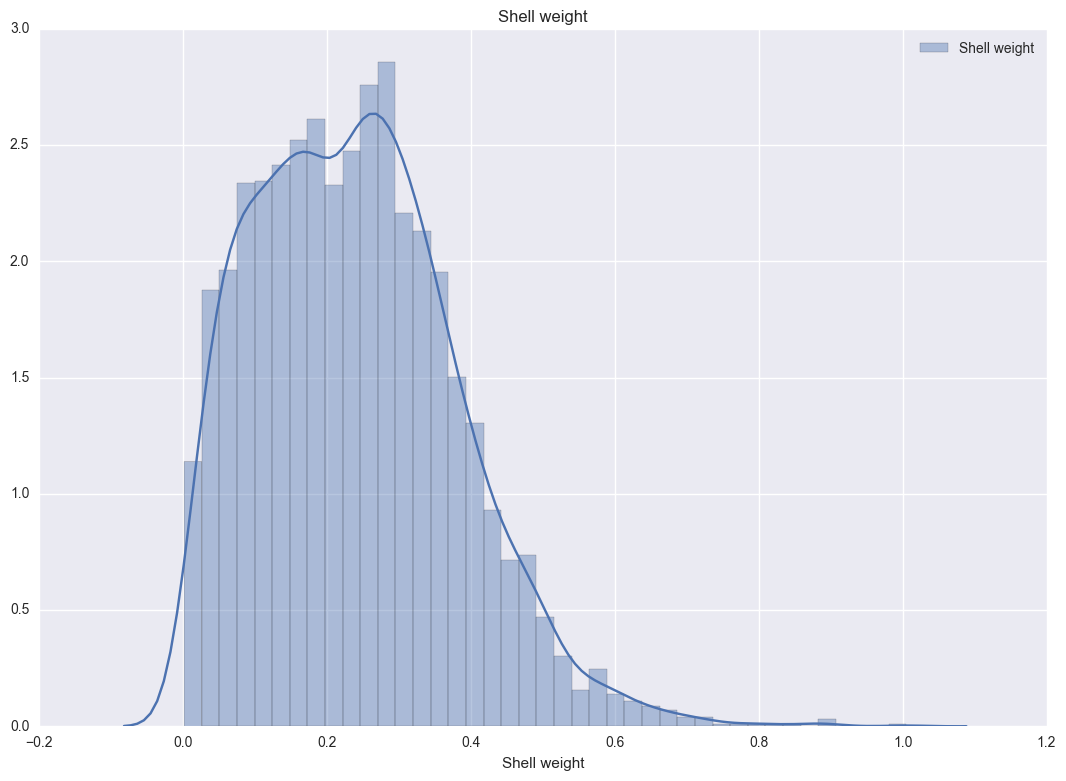

In [233]:
Shell = Abalone['Shell weight']
sns.distplot(Shell, label='Shell weight')
plt.title('Shell weight')
plt.legend() 
plt.show()

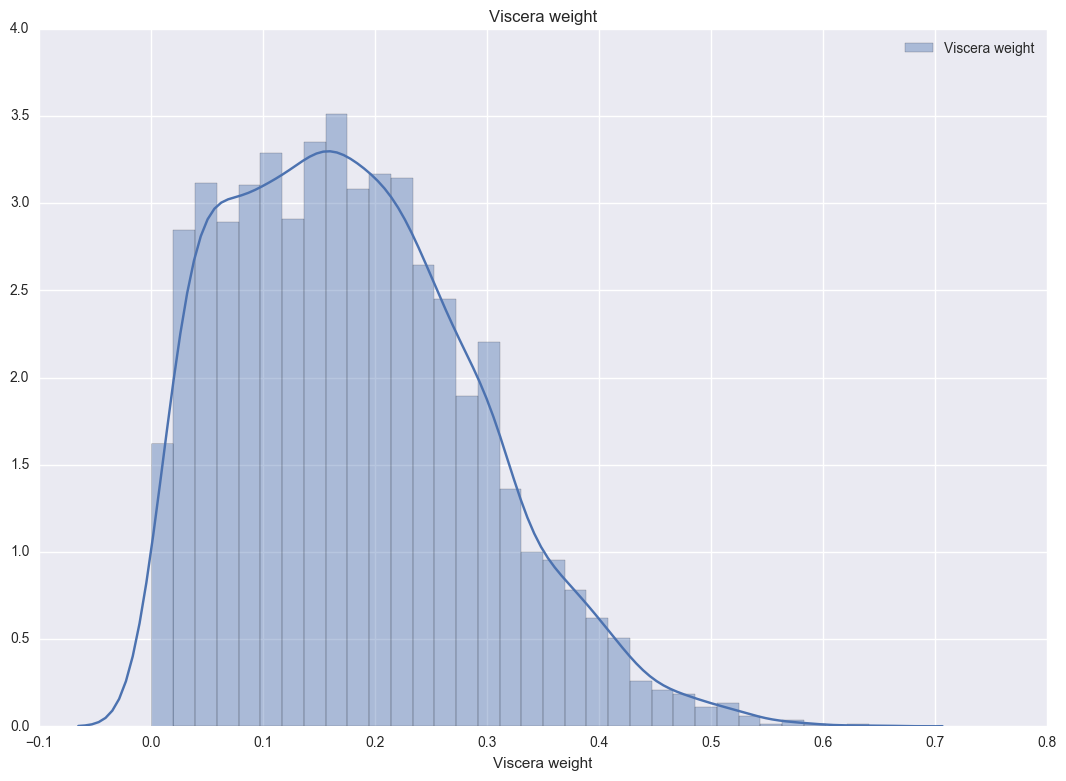

In [234]:
Viscera = Abalone['Viscera weight']
sns.distplot(Viscera, label='Viscera weight')
plt.title('Viscera weight')
plt.legend() 
plt.show()

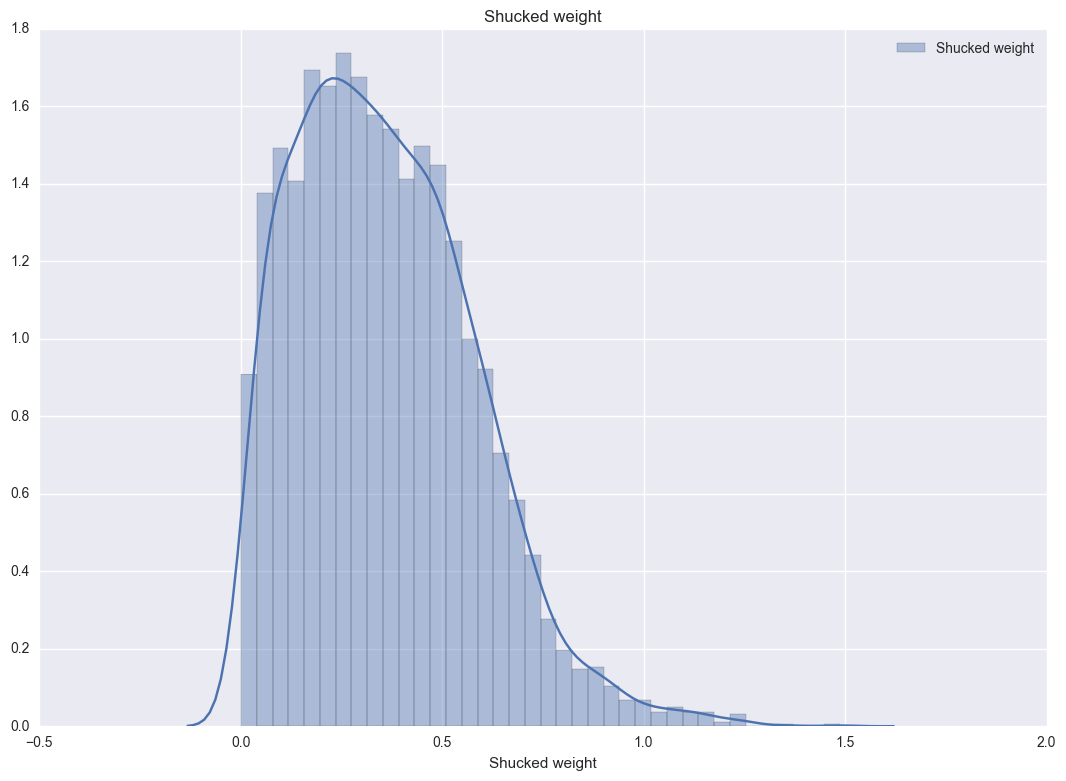

In [235]:
Shucked = Abalone['Shucked weight']
sns.distplot(Shucked, label='Shucked weight')
plt.title('Shucked weight')
plt.legend() 
plt.show()

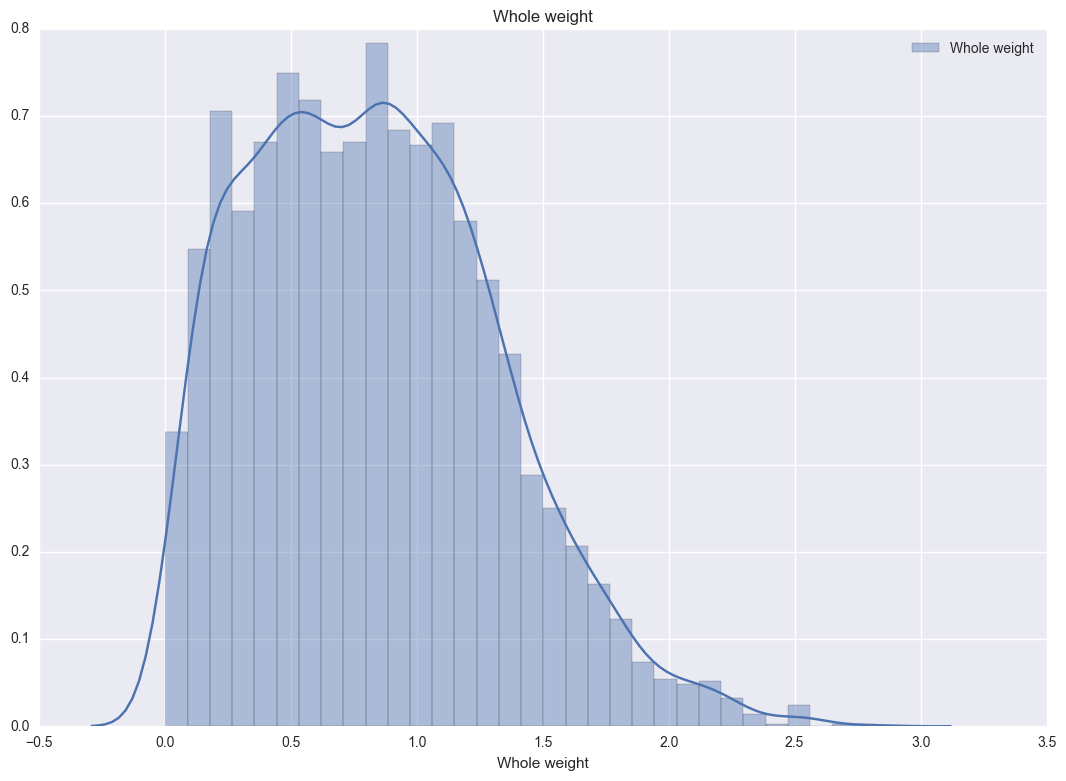

In [236]:
Whole = Abalone['Whole weight']
sns.distplot(Whole, label='Whole weight')
plt.title('Whole weight')
plt.legend() 
plt.show()

# Preprocessing

.

# Linear Ridge Regression

Linear Ridge References are based on the Following:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

How To Display Text on a Matplotlib.

https://matplotlib.org/users/pyplot_tutorial.html

Matplotlib Color Chart

http://matplotlib.org/examples/color/named_colors.html

.

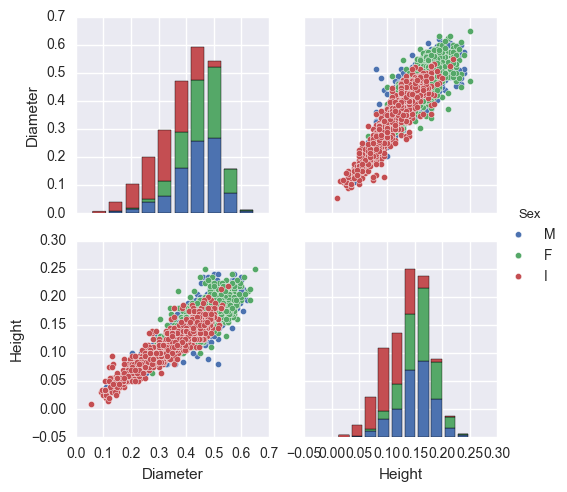

In [237]:
sns.pairplot(Abalone,vars=['Diameter',
                              'Height',],
             hue='Sex')

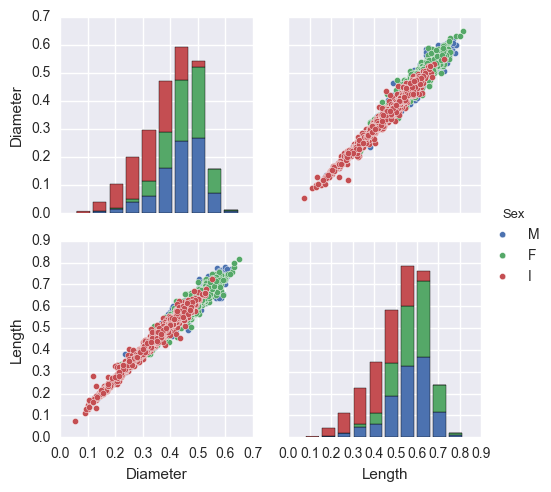

In [238]:
sns.pairplot(Abalone,vars=['Diameter',
                              'Length',],
             hue='Sex')

In [28]:
#See the Outliers in Height
Abalone_Height = Abalone['Height'] > 0.4
Abalone[Abalone_Height]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1417   M   0.705     0.565   0.515         2.210          1.1075   
2051   F   0.455     0.355   1.130         0.594          0.3320   

      Viscera weight  Shell weight  Rings  
1417          0.4865        0.5120   10.0  
2051          0.1160        0.1335    8.0

In [29]:
#Drop the Height Category
Abalone = Abalone.drop(Abalone.index[Abalone['Height'] > 0.4])
Abalone_Height = Abalone['Height'] > 0.4
Abalone[Abalone_Height]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

In [30]:
Abalone_Height = Abalone['Height'] < 0.02
Abalone[Abalone_Height]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
236    I   0.075     0.055   0.010        0.0020          0.0010   
1174   F   0.635     0.495   0.015        1.1565          0.5115   
2169   I   0.165     0.115   0.015        0.0145          0.0055   

      Viscera weight  Shell weight  Rings  
236           0.0005        0.0015    1.0  
1174          0.3080        0.2885    9.0  
2169          0.0030        0.0050    4.0

In [31]:
#Drop the Height Category
Abalone.drop([1174],inplace=True)

In [32]:
Abalone[(Abalone['Diameter'] == 0.375)&(Abalone['Length'] < 0.2)]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1210   I   0.185     0.375    0.12        0.4645           0.196   

      Viscera weight  Shell weight  Rings  
1210          0.1045          0.15    6.0

In [33]:
Abalone.drop([1210],inplace=True)

In [34]:
Abalone_Height = Abalone['Height'] < 0.02
Abalone[Abalone_Height]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
236    I   0.075     0.055   0.010        0.0020          0.0010   
2169   I   0.165     0.115   0.015        0.0145          0.0055   

      Viscera weight  Shell weight  Rings  
236           0.0005        0.0015    1.0  
2169          0.0030        0.0050    4.0

In [35]:
Abalone[(Abalone['Diameter'] == 0.375)&(Abalone['Length'] < 0.2)]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

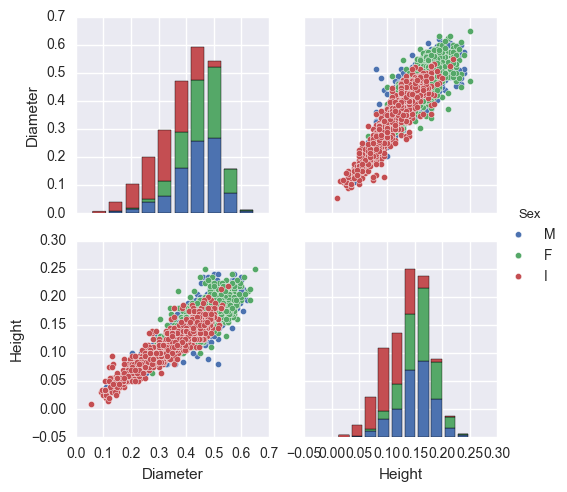

In [247]:
sns.pairplot(Abalone,vars=['Diameter',
                              'Height',],
             hue='Sex')

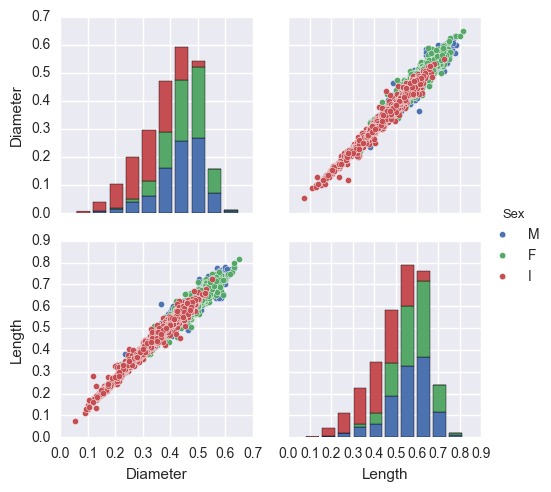

In [278]:
sns.pairplot(Abalone,vars=['Diameter',
                              'Length',],
             hue='Sex')

In [36]:
Abalone[(Abalone['Diameter'] <0.4 )&(Abalone['Length'] > 0.6)&(Abalone['Sex'] == 'M')]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4089   M    0.61     0.365   0.155        1.0765           0.488   

      Viscera weight  Shell weight  Rings  
4089           0.249          0.27    9.0

This May be an Outleir.

In [37]:
Abalone.drop([4089],inplace=True)

In [38]:
Abalone[(Abalone['Diameter'] <0.4 )&(Abalone['Length'] > 0.6)&(Abalone['Sex'] == 'M')]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

In [39]:
Abalone[(Abalone['Rings'] > 20)&(Abalone['Sex'] == 'I')]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
628   I    0.53     0.415   0.145         0.944          0.3845   

     Viscera weight  Shell weight  Rings  
628           0.185         0.265   21.0

In [40]:
Abalone[(Abalone['Rings'] > 25)&(Abalone['Diameter'] < 5)]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
294    M   0.600     0.495   0.195        1.0575          0.3840   
480    F   0.700     0.585   0.185        1.8075          0.7055   
2108   M   0.665     0.535   0.225        2.1835          0.7535   
2209   F   0.550     0.465   0.180        1.2125          0.3245   

      Viscera weight  Shell weight  Rings  
294           0.1900         0.375   26.0  
480           0.3215         0.475   29.0  
2108          0.3910         0.885   27.0  
2209          0.2050         0.525   27.0

In [41]:
Abalone.drop([628],inplace=True)

In [42]:
Abalone[(Abalone['Rings'] > 20)&(Abalone['Sex'] == 'I')]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

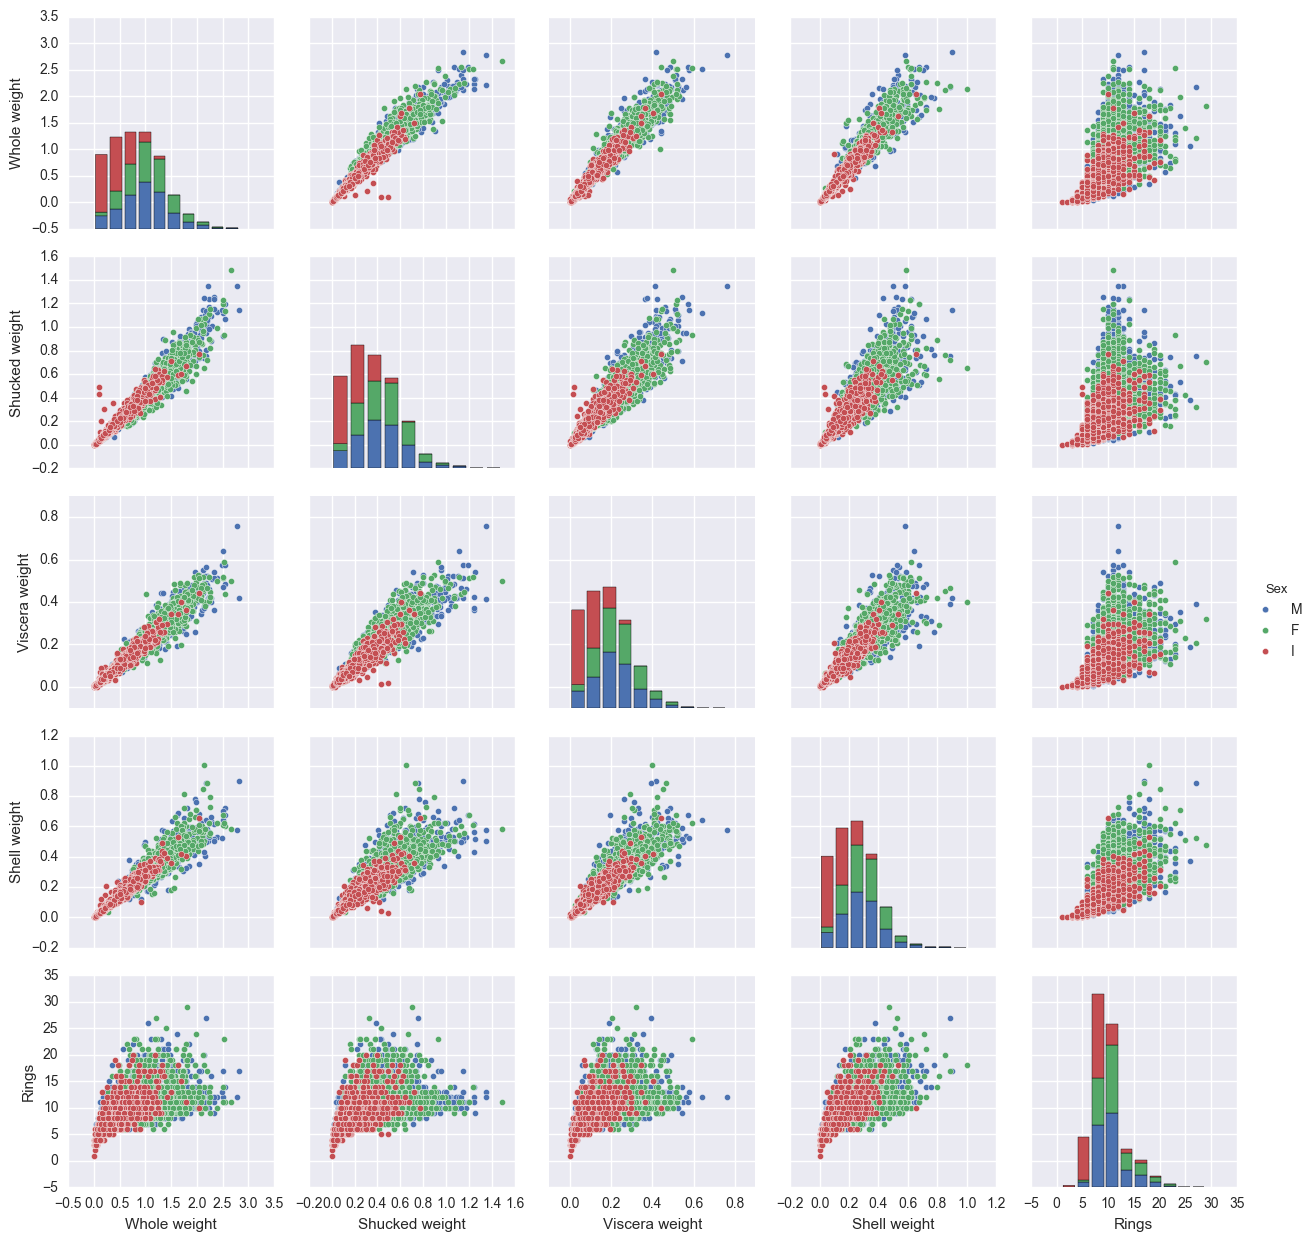

In [437]:
sns.pairplot(Abalone,vars=['Whole weight','Shucked weight',
                              'Viscera weight','Shell weight','Rings']
             ,hue='Sex')

Shell Weight is lower as the Viscera Weight gains for a Male in the Chart

In [43]:
Abalone[(Abalone['Shell weight'] < .6)&(Abalone['Sex'] == 'M')&
              (Abalone['Viscera weight'] > .7)]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1763   M   0.775      0.63    0.25        2.7795          1.3485   

      Viscera weight  Shell weight  Rings  
1763            0.76         0.578   12.0

In [44]:
Abalone.drop([1763],inplace=True)

In [45]:
Abalone[(Abalone['Shell weight'] < .6)&(Abalone['Sex'] == 'M')&
              (Abalone['Viscera weight'] > .7)]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

The Graph Is Showing a Much Better visualization 

# Modelling 

# Ridge

In [46]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [47]:
#Make a Copy of the Abalone Data Frame
Ridge_Abalone = Abalone.copy()

In [48]:
np.mean(Abalone['Rings'])

9.9334454589139831

In [49]:
#Converting Male to Int
def Male(sex):
    Sex = sex 
    if Sex != 'M':
        return 0
    if Sex == 'M': 
        return 1
#Converting Female to 
def Female(sex):
    Sex = sex 
    if Sex != 'F':
        return 0 
    if Sex == 'F': 
        return 1

#Converting Infinite to 
def infinite(sex): 
    Sex = sex
    if Sex != 'I': 
        return 0
    if Sex == 'I':
        return 1

#Adding new Column to the DataFrame 

Ridge_Abalone['M'] = Ridge_Abalone['Sex'].apply(Male) 
Ridge_Abalone['I'] = Ridge_Abalone['Sex'].apply(infinite) 
Ridge_Abalone['F'] = Ridge_Abalone['Sex'].apply(Female)

#Remove Column Sex
del Ridge_Abalone['Sex']

In [50]:
Ridge_Abalone_y_features = Ridge_Abalone.Rings.values

In [51]:
del Ridge_Abalone['Rings']

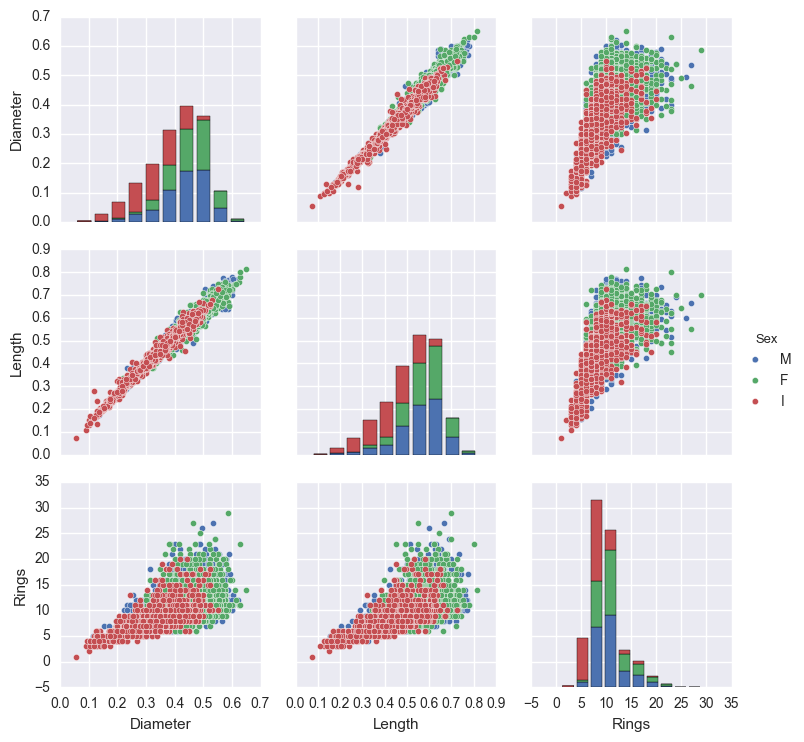

In [447]:
sns.pairplot(Abalone,vars=['Diameter',
                              'Length','Rings'],
             hue='Sex')

In [52]:
Ridge_Abalone_x_features = Ridge_Abalone

In [53]:
X_train, X_test, y_train, y_test = train_test_split(Ridge_Abalone_x_features,
                                                                     Ridge_Abalone_y_features)


In [54]:
Ridge_Model = linear_model.Ridge(fit_intercept=True, alpha=0.1,
                                 random_state=0, normalize=True)

In [55]:
Ridge_Model.fit(Ridge_Abalone_x_features,Ridge_Abalone_y_features)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=0, solver='auto', tol=0.001)

In [56]:
Ridge_Model.score(X_test,y_test)

0.4925623946277084

In [57]:
#>>> from sklearn.model_selection import cross_val_predict
#>>> predicted = cross_val_predict(clf, iris.data, iris.target, cv=10)
#>>> metrics.accuracy_score(iris.target, predicted) 

scores = cross_validation.cross_val_score(Ridge_Model,Ridge_Abalone_x_features,
                                          Ridge_Abalone_y_features,cv=10)
print scores
print scores.mean()

[ 0.52416496  0.23176978  0.28914879  0.14041469  0.32830061  0.39857739
  0.32773658  0.45622066  0.40814722  0.45139793]
0.3555878609


# Remove Outliers


.

In [58]:
Ridge = Abalone.copy()

In [59]:
Ridge.corr()

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.987666  0.903283      0.926126        0.898819   
Diameter        0.987666  1.000000  0.909085      0.925936        0.893637   
Height          0.903283  0.909085  1.000000      0.890418        0.838702   
Whole weight    0.926126  0.925936  0.890418      1.000000        0.969346   
Shucked weight  0.898819  0.893637  0.838702      0.969346        1.000000   
Viscera weight  0.904292  0.900581  0.868861      0.966307        0.931485   
Shell weight    0.898685  0.905910  0.893039      0.956283        0.883181   
Rings           0.557338  0.575463  0.611804      0.541899        0.421902   

                Viscera weight  Shell weight     Rings  
Length                0.904292      0.898685  0.557338  
Diameter              0.900581      0.905910  0.575463  
Height                0.868861      0.893039  0.611804  
Whole weight          0.966307      0.956283  0.541899  
Shucked weight        0.931485      0.883181  0.421902  
Viscera weight        1.000000      0.908768  0.505822  
Shell weight          0.908768      1.000000  0.629054  
Rings                 0.505822      0.629054  1.000000

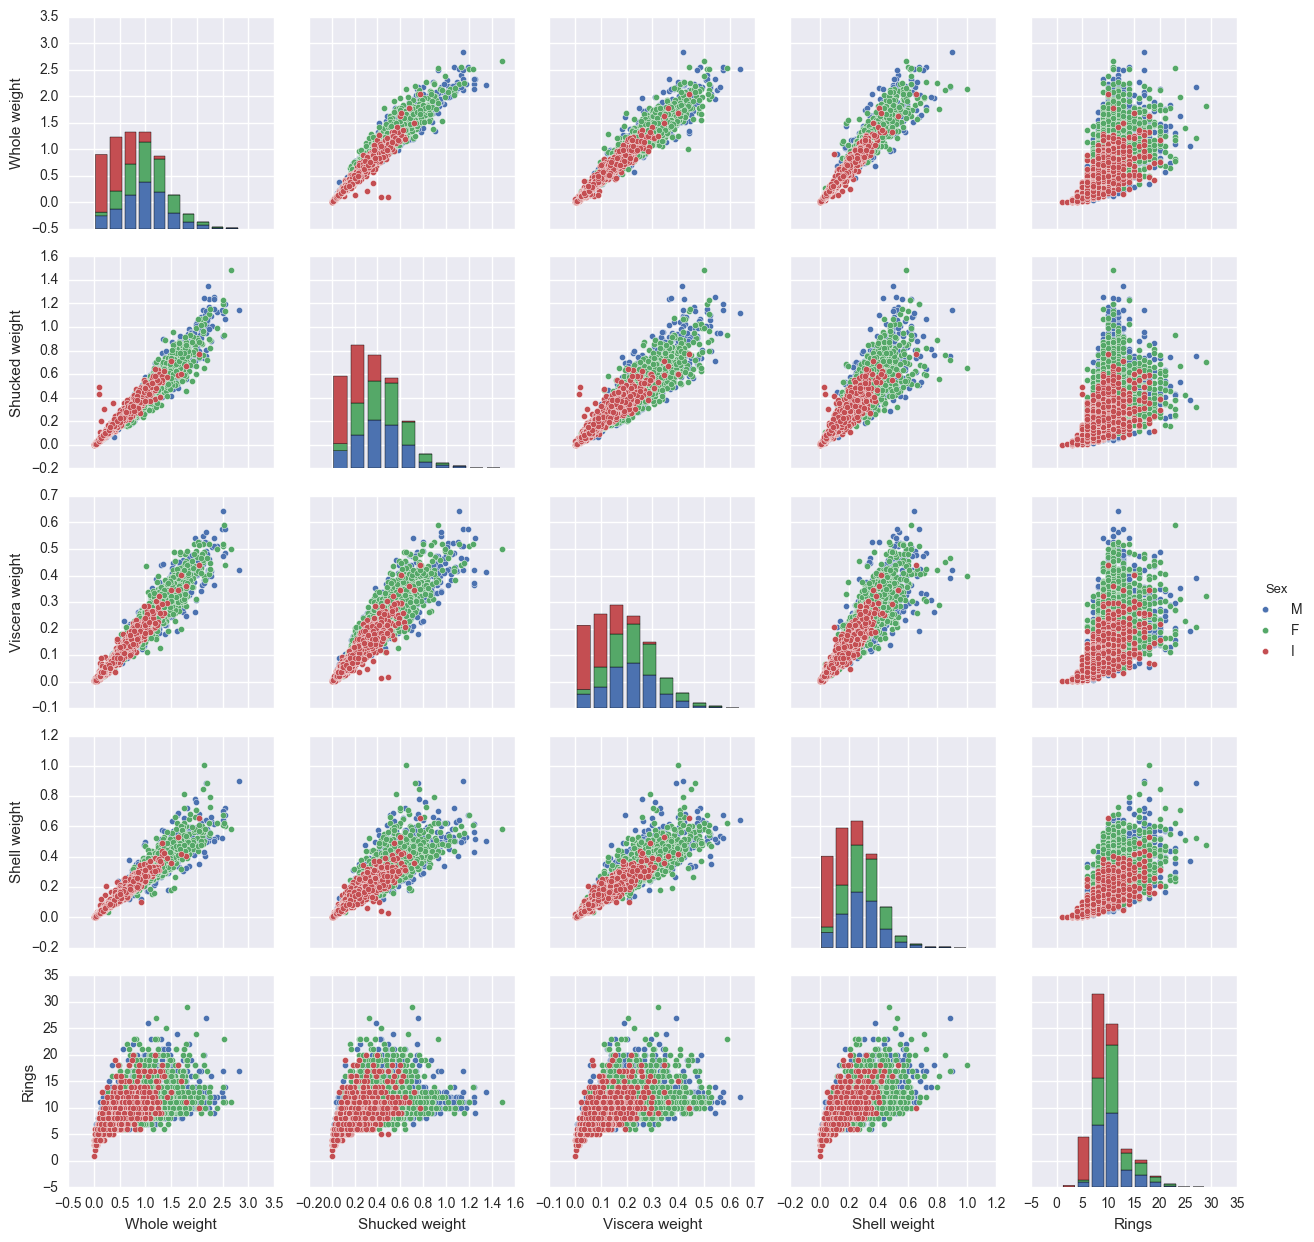

In [456]:
sns.pairplot(Ridge,vars=['Whole weight','Shucked weight',
                              'Viscera weight','Shell weight','Rings']
             ,hue='Sex')

In [60]:
np.mean(Ridge['Whole weight']) #Getting the Mean Before Removing OutLiers

0.82779769341662657

In [61]:
np.mean(Ridge['Rings']) #Getting the Mean Before Removing OutLiers

9.9334454589139831

In [62]:
#def Outliers(data):
 #   u = np.median(data)
#    s = np.std(data)
   # fil = [ i for i in data if (u - 2 * s < i < u + 2 * s )] 
    #return data
def Outliers(data):
    median, std = data.median(), data.std()
    outliers = (data - median).abs() > 4 *std
    data[outliers] = np.nan       
    return data

In [63]:
fil = Outliers(Ridge['Whole weight'])

C:\Users\dfoley\Documents\Canopy\User\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [64]:
Ridge.tail()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
4172          0.2390        0.2490   11.0  
4173          0.2145        0.2605   10.0  
4174          0.2875        0.3080    9.0  
4175          0.2610        0.2960   10.0  
4176          0.3765        0.4950   12.0

In [65]:
Ridge = Ridge.dropna()

In [66]:
np.mean(Ridge['Rings'])

9.9317471761595773

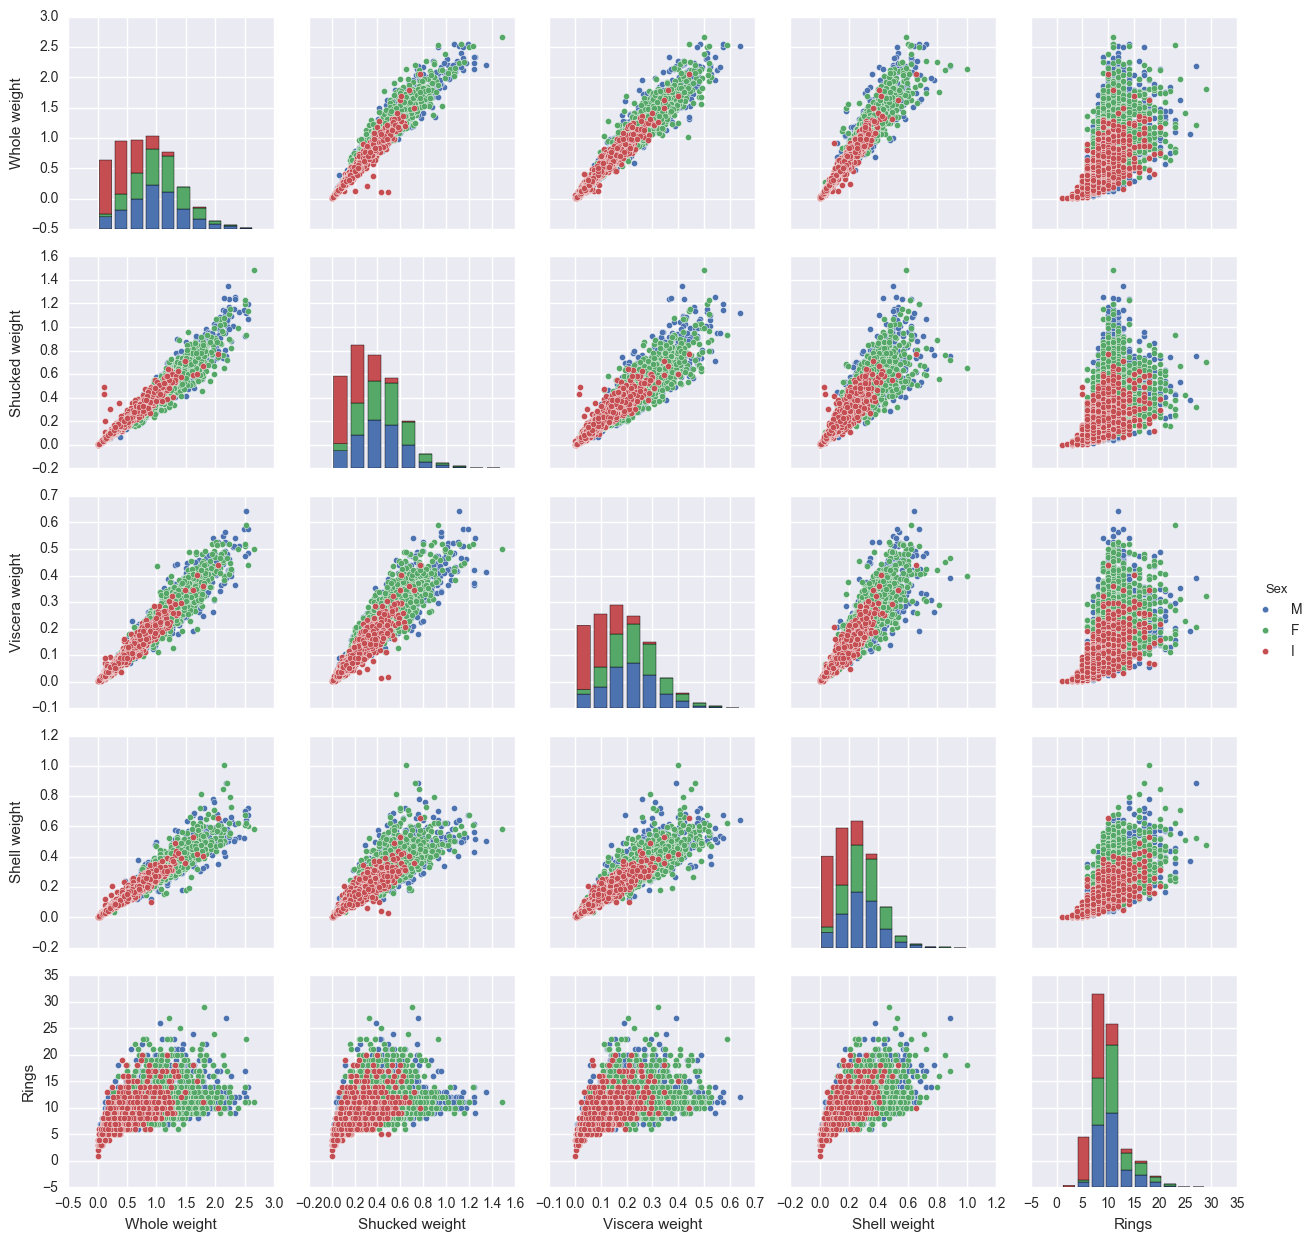

In [313]:
sns.pairplot(Ridge,vars=['Whole weight','Shucked weight',
                              'Viscera weight','Shell weight','Rings']
             ,hue='Sex')

In [67]:
Ridge[(Ridge['Whole weight'] <0.2 )&(Ridge['Shucked weight'] > 0.4)&(Ridge['Sex'] == 'I')]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1216   I   0.310     0.225    0.07        0.1055           0.435   
2627   I   0.275     0.205    0.07        0.1055           0.495   

      Viscera weight  Shell weight  Rings  
1216           0.015        0.0400    5.0  
2627           0.019        0.0315    5.0

In [68]:
Ridge.drop([1216],inplace=True)
Ridge.drop([2627],inplace=True)

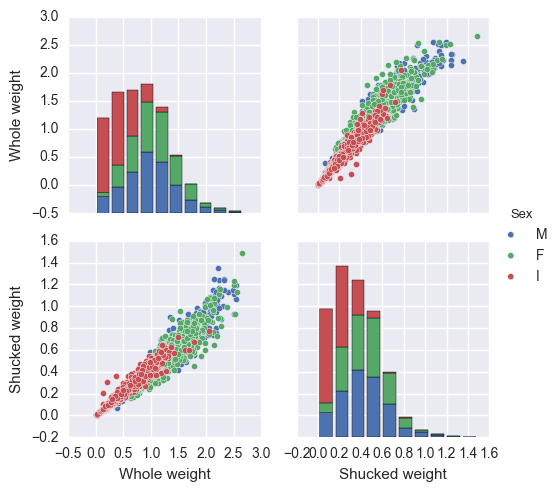

In [466]:
sns.pairplot(Ridge,vars=['Whole weight','Shucked weight',]
             ,hue='Sex')

In [69]:
Ridge[(Ridge['Whole weight'] > 1.5 )&(Ridge['Shucked weight'] > 0.2)&(Ridge['Sex'] == 'I')]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
660    I   0.650     0.525   0.180        1.6260          0.5970   
2537   I   0.660     0.525   0.215        1.7860          0.6725   
3337   I   0.660     0.525   0.180        1.6935          0.6025   
3928   I   0.725     0.550   0.220        2.0495          0.7735   

      Viscera weight  Shell weight  Rings  
660           0.3445        0.5300   18.0  
2537          0.3615        0.4065   11.0  
3337          0.4005        0.4200   15.0  
3928          0.4405        0.6550   10.0

In [70]:
Ridge.drop([660],inplace=True)
Ridge.drop([2537],inplace=True)
Ridge.drop([3337],inplace=True)
Ridge.drop([3928],inplace=True)

In [71]:
#Converting Male to Int
def Male(sex):
    Sex = sex 
    if Sex != 'M':
        return 0
    if Sex == 'M': 
        return 1

#Converting Female to 
def Female(sex):
    Sex = sex 
    if Sex != 'F':
        return 0 
    if Sex == 'F': 
        return 1

#Converting Infinite to 
def infinite(sex): 
    Sex = sex
    if Sex != 'I': 
        return 0
    if Sex == 'I':
        return 1

#Adding new Column to the DataFrame 

Ridge['M'] = Ridge['Sex'].apply(Male) 
Ridge['I'] = Ridge['Sex'].apply(infinite) 
Ridge['F'] = Ridge['Sex'].apply(Female)

#Remove Column Sex
del Ridge['Sex']

In [72]:
y = Ridge.Rings.values

In [73]:
del Ridge['Rings']

In [74]:
x = Ridge

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x,y)


In [76]:
MODE = linear_model.Ridge(fit_intercept=True, alpha=0.1,random_state=0,normalize=True)
MODE.fit(x,y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=0, solver='auto', tol=0.001)

In [77]:
MODE.score(X_test,y_test)

0.51945340794680361

In [78]:
scores = cross_validation.cross_val_score(MODE,x,y,cv=10)
print scores
print scores.mean()

[ 0.52487254  0.23050548  0.25326762  0.13888403  0.32839056  0.3985435
  0.31428414  0.45906037  0.40796375  0.45742601]
0.351319799841


In [79]:
MODE.predict(x)

array([  8.79427852,   7.95817051,  10.5593118 , ...,  11.80192649,
        10.53079617,  11.69318433])

In [80]:
y_pred = MODE.predict(x)
len(y_pred)

4155

In [81]:
y = y
len(y)

4155

Model Predication Scatter Plots Referance from SK-Learn

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py

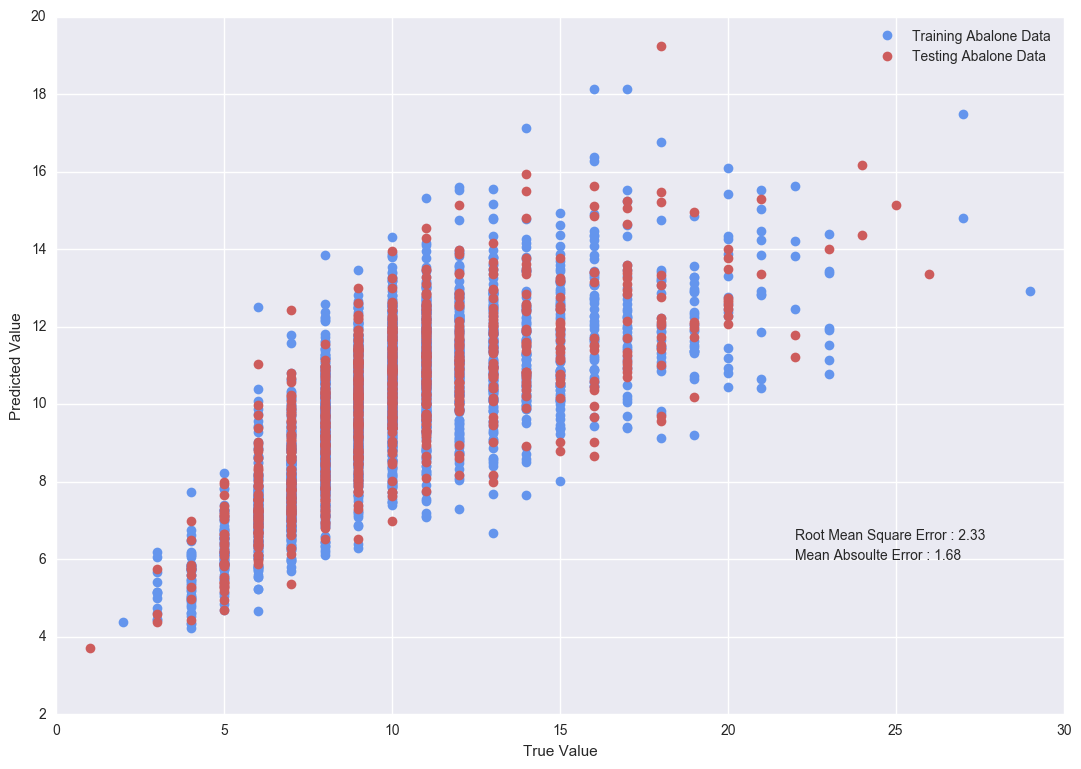

In [82]:
# Plot the results
plt.figure()




plt.plot(y_train, MODE.predict(X_train), marker='o', 
         linestyle='', color='cornflowerblue', label='Training Abalone Data')



plt.plot(y_test, MODE.predict(X_test), marker='o',
         linestyle='', color='indianred', label = 'Testing Abalone Data',)



MAE = 'Mean Absoulte Error : %.2f' % mean_absolute_error(y_test, MODE.predict(X_test))
RMSE = 'Root Mean Square Error : %.2f' % sqrt(mean_squared_error(y_test, MODE.predict(X_test)))


plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.text(22,6,MAE) 
plt.text(22,6.5,RMSE)
plt.text
plt.show()

.




# Decision Tree 


 

Decision Tree References are based on the Following:

http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

Udemy : Decision Trees Concepts / Activity Decision Tress Predicting Hiring Decisions.

https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/

How To Display Text on a Matplotlib.

https://matplotlib.org/users/pyplot_tutorial.html




.

In [83]:
from sklearn import tree

In [84]:
# Fit regression model
DecisionTree_Model = tree.DecisionTreeRegressor(max_depth=7)
DecisionTree_Model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [85]:
DecisionTree_Model.score(X_test,y_test)

0.51494151904126784

In [86]:
scores = cross_validation.cross_val_score(DecisionTree_Model,x,
                                          y,cv=10)
print scores
print scores.mean()

[ 0.40147097  0.31315889  0.24105862 -0.17412904  0.25522065  0.34781088
  0.04864211  0.27061994  0.47247428  0.4366327 ]
0.26129600101


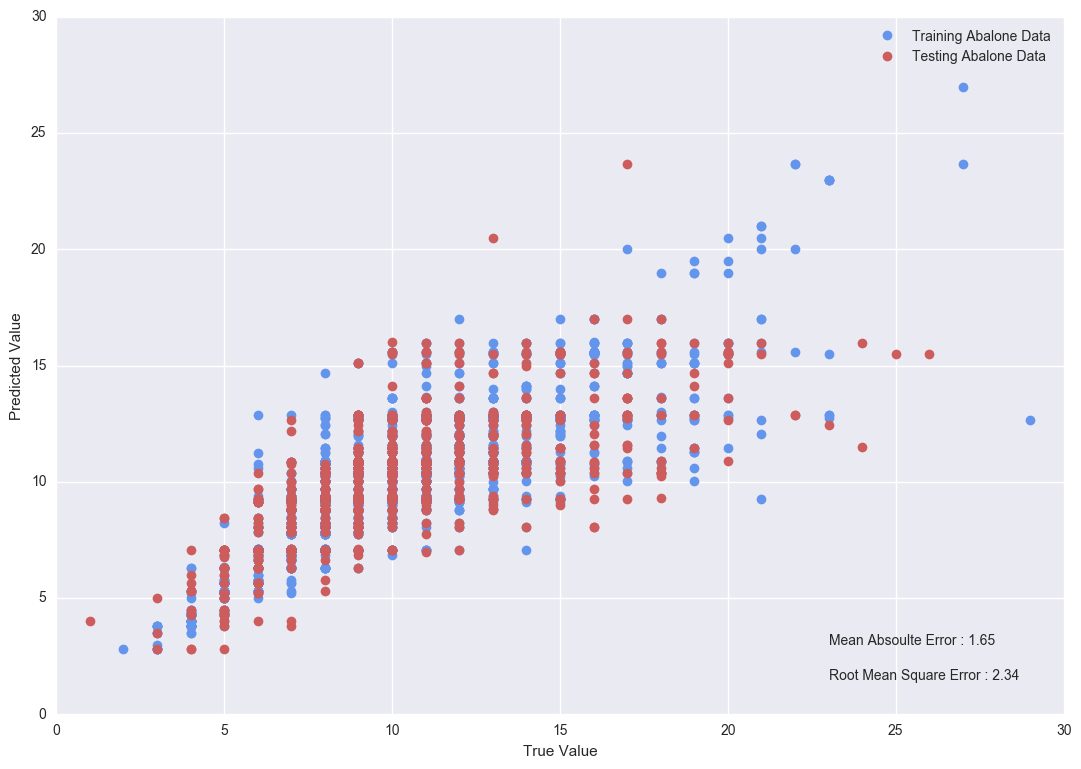

In [87]:
# Plot the results
plt.figure()


plt.plot(y_train, DecisionTree_Model.predict(X_train), marker='o', 
         linestyle='', color='cornflowerblue', label='Training Abalone Data')


plt.plot(y_test, DecisionTree_Model.predict(X_test), marker='o',
         linestyle='', color='indianred', label = 'Testing Abalone Data',)

# Print error measurements
MAE = 'Mean Absoulte Error : %.2f' % mean_absolute_error(y_test,DecisionTree_Model.predict(X_test))
RMSE = 'Root Mean Square Error : %.2f' % sqrt(mean_squared_error(y_test, DecisionTree_Model.predict(X_test)))


plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.text(23,3,MAE) 
plt.text(23,1.5,RMSE)
plt.text
plt.show()



# Random Forest

Random Forest References are based on the Following:

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Udemy : Decision Trees Concepts / Activity Decision Tress Predicting Hiring Decisions.

https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/

How To Display Text on a Matplotlib.

https://matplotlib.org/users/pyplot_tutorial.html




We will build on our Decision Tree Model. with Random Forest ML

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
estimator = RandomForestRegressor(random_state=0, n_estimators=100)

In [90]:
estimator.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [91]:
estimator.score(X_test,y_test)

0.57172953178746555

In [92]:
scores = cross_validation.cross_val_score(estimator,x,
                                          y,cv=10)
print scores
print scores.mean()

[ 0.51758587  0.40399504  0.38564873  0.03755789  0.30219207  0.48037476
  0.47717161  0.46952483  0.53146483  0.44842779]
0.405394341923


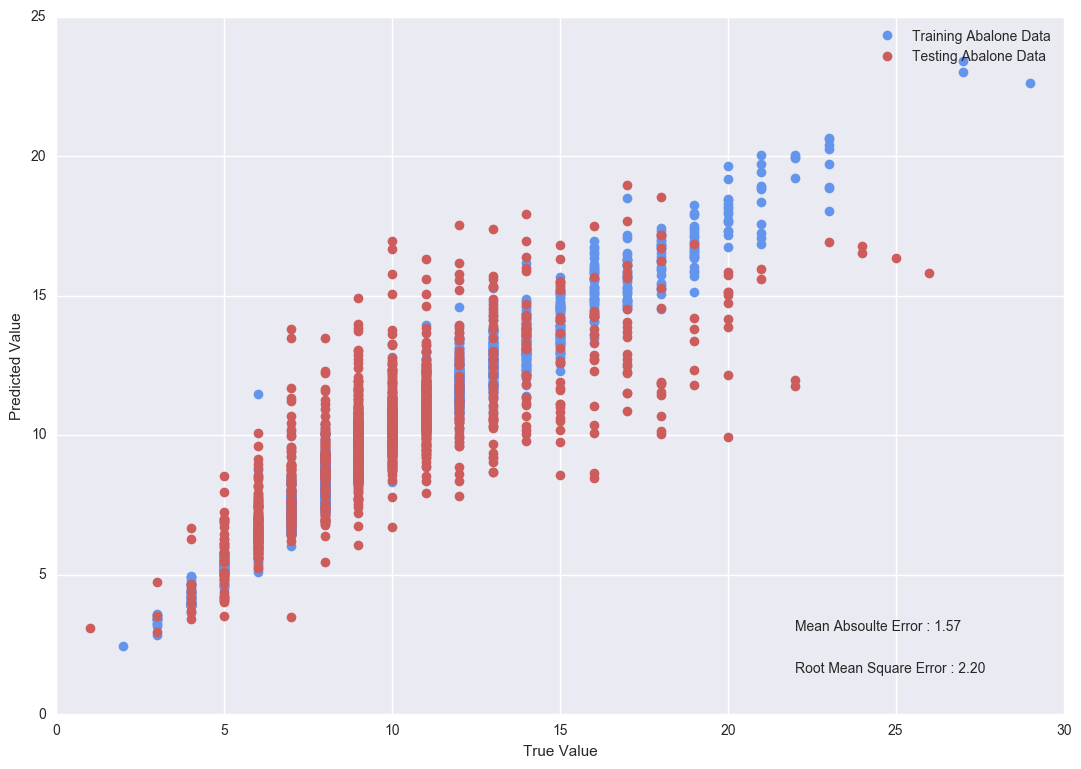

In [93]:
# Plot the results
plt.figure()


plt.plot(y_train, estimator.predict(X_train), marker='o',
         linestyle='', color='cornflowerblue', label='Training Abalone Data')
    
plt.plot(y_test, estimator.predict(X_test), marker='o',
         linestyle='', color='indianred', label = 'Testing Abalone Data')

# Print error measurements
MAE = 'Mean Absoulte Error : %.2f' % mean_absolute_error(y_test, estimator.predict(X_test))
RMSE = 'Root Mean Square Error : %.2f' % sqrt(mean_squared_error(y_test,estimator.predict(X_test)))


plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.text(22,3,MAE) 
plt.text(22,1.5,RMSE)
plt.text
plt.show()

OverAll Random Forest Seems to be the best fit for this data with the lowest RMSE and Mean Absoulte Error:

.

# Elastic Net

In [491]:
#ELASTIC.head()

In [94]:
from sklearn.linear_model import ElasticNet

In [493]:
#ELASTIC = dict(zip(['I','F','M'],[1,2,3]))
#ELASTIC['Sex'].replace(['I','F','M'],[1,2,3],inplace=True)

In [494]:
#ELASTIC.head()

In [495]:
#Abalone_Y_Feature = ELASTIC['Rings']
#del ELASTIC['Rings']

In [496]:
#Abalone_X_Feature = ELASTIC

In [497]:
#train_x, test_x, train_y, test_y = train_test_split(Abalone_X_Feature,Abalone_Y_Feature)

In [95]:
ElasticNet = linear_model.ElasticNet(fit_intercept=True, alpha=0.1,
                                 random_state=0, normalize=True)

In [96]:
ElasticNet.fit(X_test, y_test)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
ElasticNet.score(X_test, y_test)

0.012308624799624248

In [98]:
Elasticscores = cross_validation.cross_val_score(ElasticNet,X_train,y_train,cv=10)
print Elasticscores
print Elasticscores.mean()


[ -1.19141806e-03  -3.45414643e-03  -4.29374110e-05  -4.07732913e-03
  -5.11249493e-04  -4.59043837e-03  -4.48534417e-04  -5.97796987e-03
  -1.97949498e-03  -2.25326392e-04]
-0.0022498844553


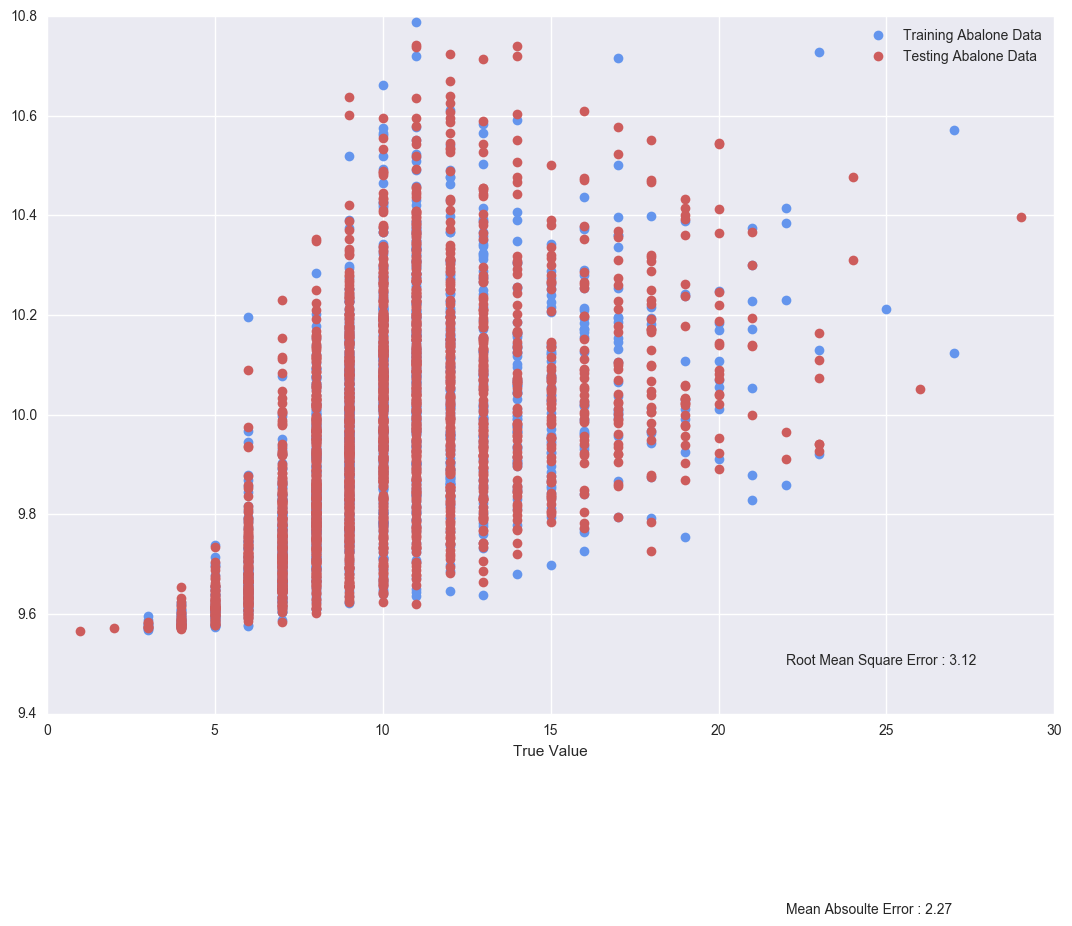

In [123]:
# Plot the results
plt.figure()
plt.plot(y_train,  ElasticNet.predict(X_train), marker='o',
         linestyle='', color='cornflowerblue', label='Training Abalone Data')
    
plt.plot(y_test, ElasticNet.predict(X_test), marker='o',
         linestyle='', color='indianred', label = 'Testing Abalone Data')

plt.xlabel("True Value")
plt.legend()
plt.text(22,9,MAE) 
plt.text(22,9.5,RMSE)
plt.text
plt.show()

# Hold-Out Cross Validation

Hold-Out Cross Validation References are based on the Following:

http://scikit-learn.org/stable/modules/cross_validation.html
    


How To Display Text on a Matplotlib.

https://matplotlib.org/users/pyplot_tutorial.html

Matplotlib Color Chart

http://matplotlib.org/examples/color/named_colors.html

.

# Rridge regression

In [101]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.6)

In [102]:
Ridge_Model2 = linear_model.Ridge(fit_intercept=True, alpha=0.1,
                                 random_state=0, normalize=True)

In [103]:
Ridge_Model2.fit(x,y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=0, solver='auto', tol=0.001)

In [104]:
Ridge_Model2.score(X_test,y_test)

0.48968469910813217

In [105]:
scores = cross_validation.cross_val_score(Ridge_Model2,x,
                                          y,cv=10)
print scores
print scores.mean()

[ 0.52487254  0.23050548  0.25326762  0.13888403  0.32839056  0.3985435
  0.31428414  0.45906037  0.40796375  0.45742601]
0.351319799841


In [106]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score 

expected = Ridge_Abalone_y_features
predicted = Ridge_Model2.predict(Ridge_Abalone_x_features)

print "Ridge regression model \n Abalone dataset"
print "Mean squared error = %0.2f" % mse(expected, predicted)
print "R2 score = %0.2f" % r2_score(expected, predicted)

Ridge regression model 
 Abalone dataset
Mean squared error = 5.20
R2 score = 0.50


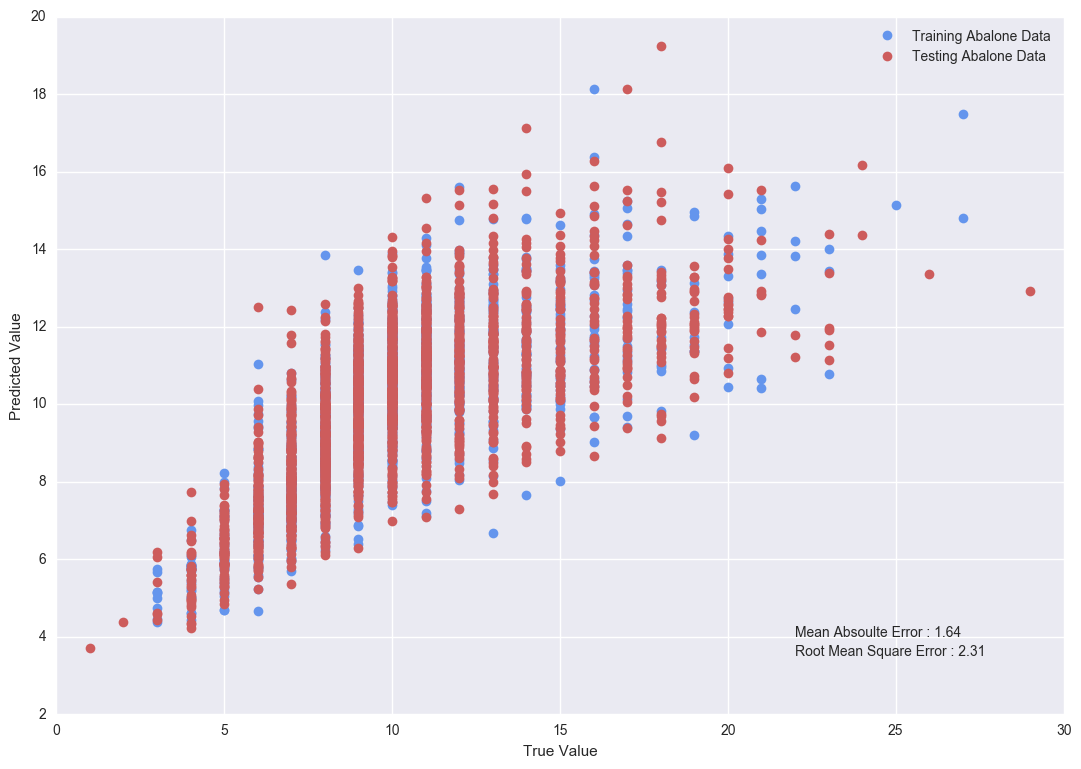

In [107]:
# Plot the results
plt.figure()




plt.plot(y_train, Ridge_Model2.predict(X_train), marker='o', 
         linestyle='', color='cornflowerblue', label='Training Abalone Data')



plt.plot(y_test, Ridge_Model2.predict(X_test), marker='o',
         linestyle='', color='indianred', label = 'Testing Abalone Data',)



# Print error measurements
MAE = 'Mean Absoulte Error : %.2f' % mean_absolute_error(y_test,Ridge_Model2.predict(X_test))
RMSE = 'Root Mean Square Error : %.2f' % sqrt(mean_squared_error(y_test, Ridge_Model2.predict(X_test)))


plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.text(22,4,MAE) 
plt.text(22,3.5,RMSE)
plt.text
plt.show()

.

# Random Forest

In [108]:
#X_train, X_test, y_train, y_test = train_test_split(Ridge_Abalone_x_features,
 #                                                                    Ridge_Abalone_y_features,test_size=.7)

In [109]:
estimator_holdout = RandomForestRegressor(random_state=0, n_estimators=100)

In [110]:
estimator_holdout.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [111]:
estimator_holdout.score(X_test,y_test)

0.51575650939201989

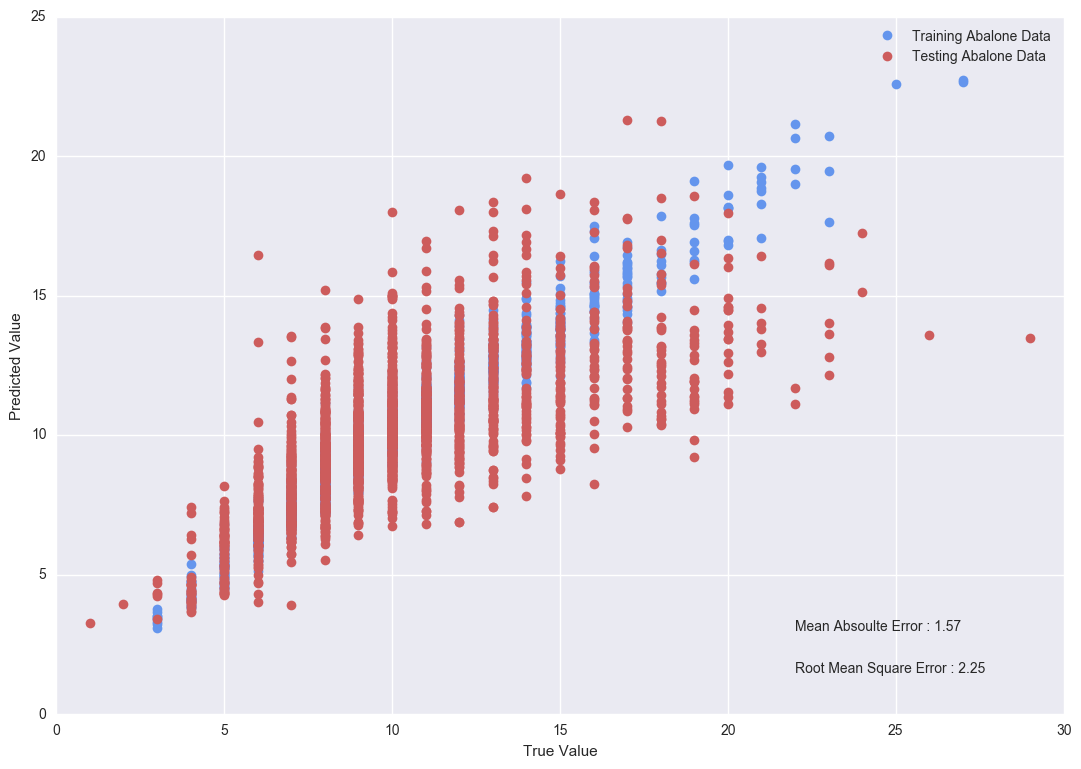

In [112]:
# Plot the results
plt.figure()
plt.plot(y_train, estimator_holdout.predict(X_train), marker='o',
         linestyle='', color='cornflowerblue', label='Training Abalone Data')
    
plt.plot(y_test,  estimator_holdout.predict(X_test), marker='o',
         linestyle='', color='indianred', label = 'Testing Abalone Data')

# Print error measurements
MAE = 'Mean Absoulte Error : %.2f' % mean_absolute_error(y_test,  estimator_holdout.predict(X_test))
RMSE = 'Root Mean Square Error : %.2f' % sqrt(mean_squared_error(y_test,  estimator_holdout.predict(X_test)))


plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.text(22,3,MAE) 
plt.text(22,1.5,RMSE)
plt.text
plt.show()

In [113]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
from sklearn.model_selection import cross_val_predict 

In [114]:
predicted = cross_val_predict(estimator_holdout,x,y, cv=10)

In [115]:
predicted1 = cross_val_predict(Ridge_Model2,x,y, cv=10)

In [116]:
y = y
x = x

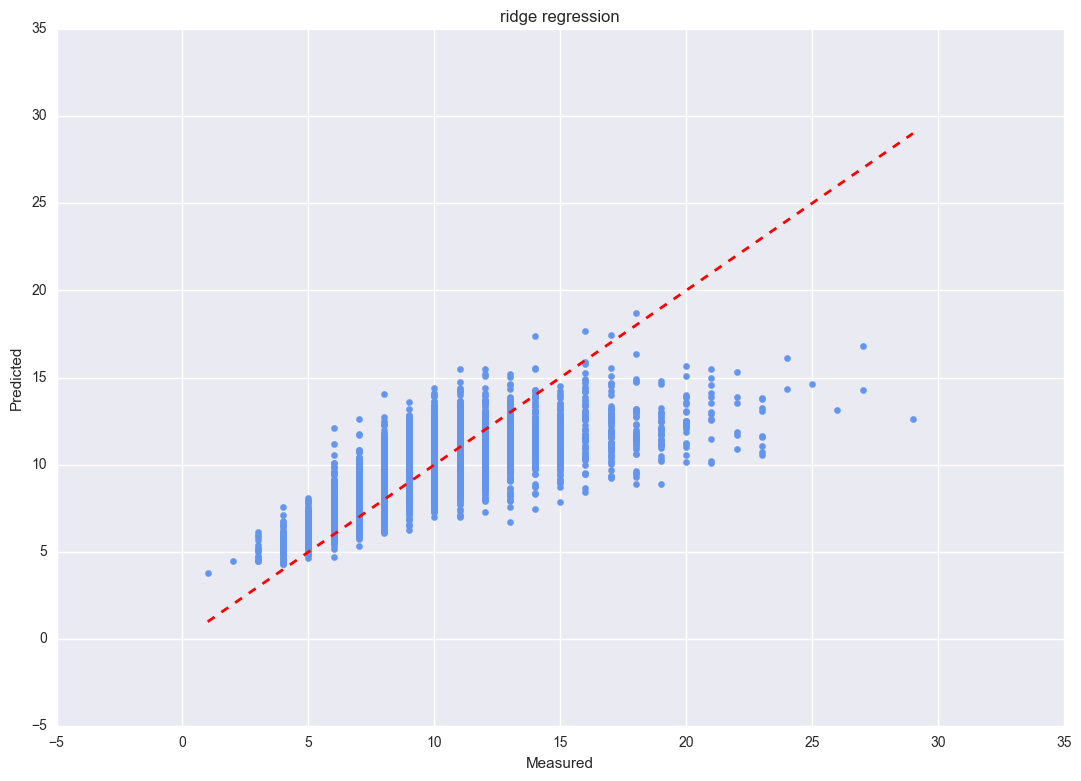

In [117]:
fig, ax = plt.subplots()
ax.scatter(y, predicted1,color='cornflowerblue')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2,color='red')
ax.set_title('ridge regression')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# ElasticNet

Refence: 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet




In [118]:
#Due to the high coefficients Test positive = True to see the validation Score.
ElasticNet = linear_model.ElasticNet(fit_intercept=True,
                                 random_state=0,positive=True,normalize=False)

In [119]:
ElasticNet.fit(X_test, y_test)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=True, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
ElasticNet.score(X_test, y_test)

0.069382726757982738

In [121]:
Elasticscores = cross_validation.cross_val_score(ElasticNet,X_train,y_train,cv=10)
print Elasticscores
print Elasticscores.mean()

[ 0.09257995  0.07946059  0.06072334  0.06848514  0.05881157  0.06456584
  0.07465436  0.05646466  0.07861341  0.07833396]
0.0712692811707


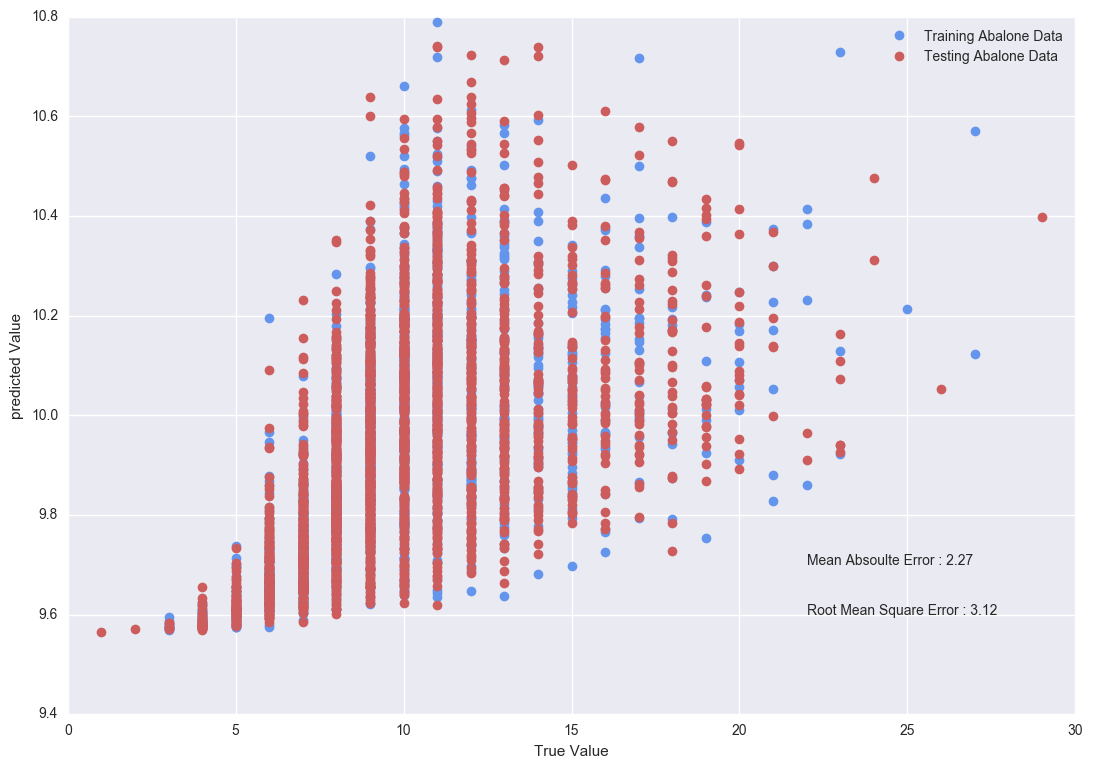

In [122]:
# Plot the results
plt.figure()
plt.plot(y_train, ElasticNet.predict(X_train), marker='o',
         linestyle='', color='cornflowerblue', label='Training Abalone Data')
    
plt.plot(y_test, ElasticNet.predict(X_test), marker='o',
         linestyle='', color='indianred', label = 'Testing Abalone Data')


MAE = 'Mean Absoulte Error : %.2f' % mean_absolute_error(y_test,ElasticNet.predict(X_test))
RMSE = 'Root Mean Square Error : %.2f' % sqrt(mean_squared_error(y_test,ElasticNet.predict(X_test)))


plt.xlabel('True Value')
plt.ylabel('predicted Value')

plt.legend()
plt.text(22,9.7,MAE) 
plt.text(22,9.6,RMSE)
plt.text
plt.show()

# Coefficient

Ref 

http://seaborn.pydata.org/generated/seaborn.heatmap.html

http://seaborn.pydata.org/examples/network_correlations.html


Udemy: Learning Python For Data Analysis and Visulization - Vid: Heatmpas and Clustered Matrices.

https://www.udemy.com/learning-python-for-data-analysis-and-visualization/

http://stattrek.com/matrix-algebra/covariance-matrix.aspx


In [124]:
Coefficient = Ridge.copy()

In [125]:
Ridge_Coefficient=Coefficient.corr(method='spearman')
Ridge_Coefficient

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.983616  0.889219      0.972590        0.958019   
Diameter        0.983616  1.000000  0.896788      0.971416        0.951795   
Height          0.889219  0.896788  1.000000      0.916802        0.875913   
Whole weight    0.972590  0.971416  0.916802      1.000000        0.978223   
Shucked weight  0.958019  0.951795  0.875913      0.978223        1.000000   
Viscera weight  0.952407  0.948326  0.901529      0.975096        0.948720   
Shell weight    0.948538  0.954796  0.923048      0.970054        0.919412   
M               0.237214  0.242953  0.235356      0.262412        0.259366   
I              -0.554931 -0.568356 -0.565726     -0.593552       -0.561943   
F               0.311771  0.319312  0.324553      0.324450        0.295829   

                Viscera weight  Shell weight         M         I         F  
Length                0.952407      0.948538  0.237214 -0.554931  0.311771  
Diameter              0.948326      0.954796  0.242953 -0.568356  0.319312  
Height                0.901529      0.923048  0.235356 -0.565726  0.324553  
Whole weight          0.975096      0.970054  0.262412 -0.593552  0.324450  
Shucked weight        0.948720      0.919412  0.259366 -0.561943  0.295829  
Viscera weight        1.000000      0.938607  0.256212 -0.596210  0.333557  
Shell weight          0.938607      1.000000  0.252599 -0.586524  0.327569  
M                     0.256212      0.252599  1.000000 -0.521421 -0.513655  
I                    -0.596210     -0.586524 -0.521421  1.000000 -0.464298  
F                     0.333557      0.327569 -0.513655 -0.464298  1.000000

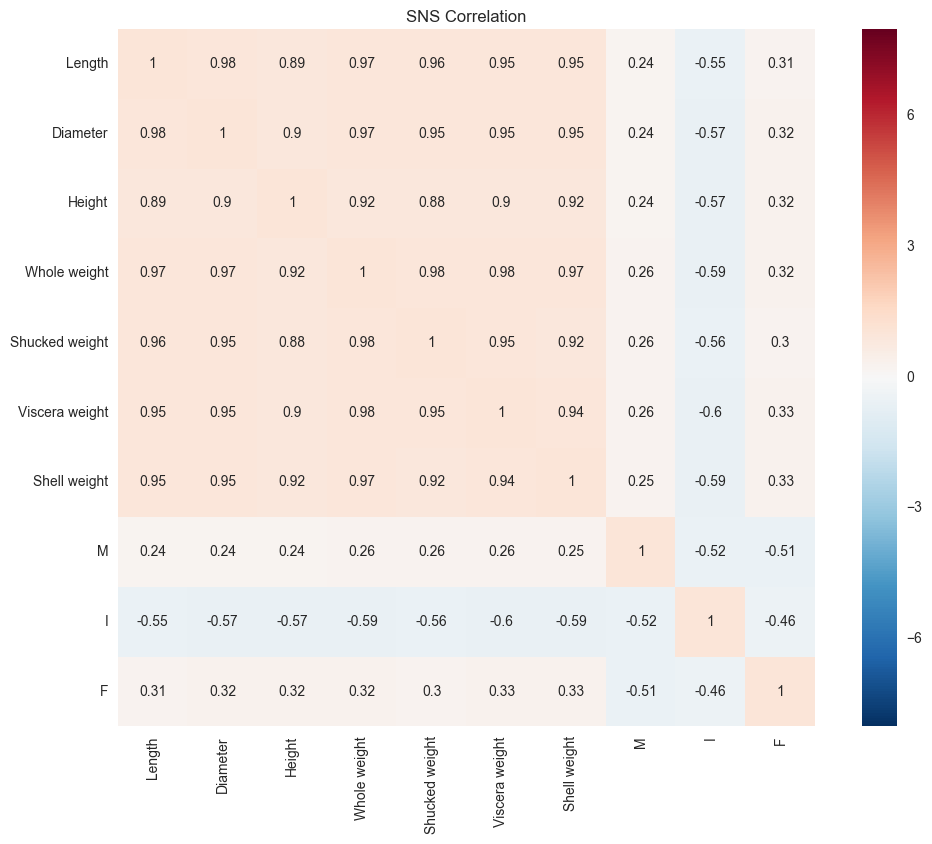

In [126]:
plt.figure(figsize=(12,9))
sns.heatmap(Ridge_Coefficient,annot=True,square=True,vmax=8)
plt.title('SNS Correlation')
plt.show()

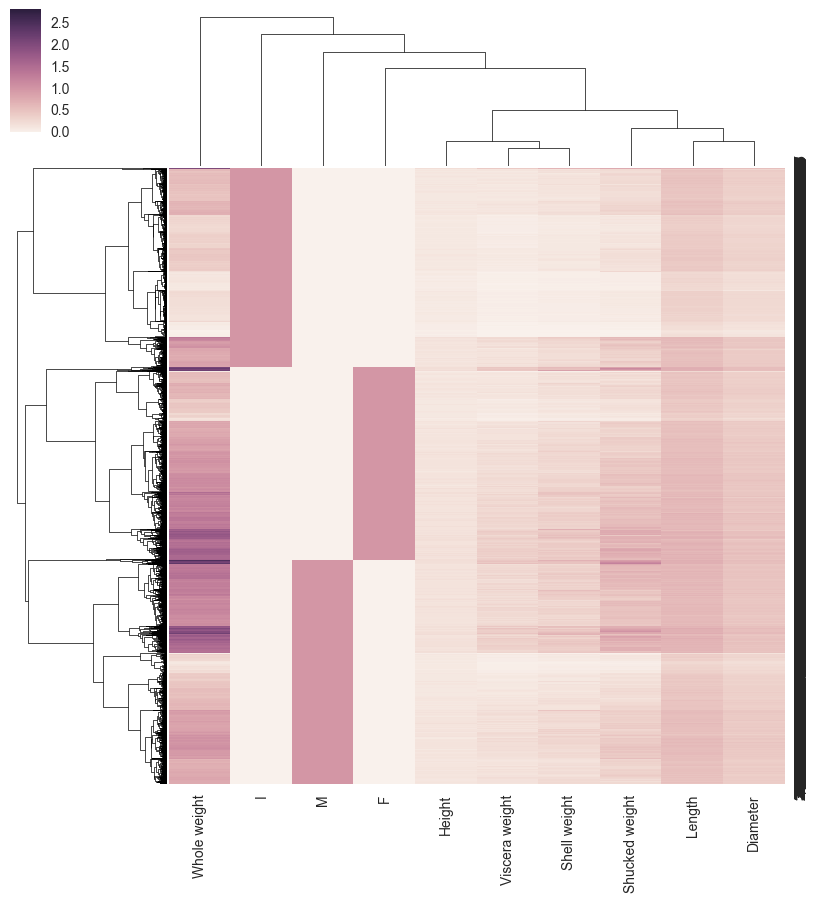

In [127]:
sns.clustermap(Ridge_Abalone)

In [128]:
Ridge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4155 entries, 0 to 4176
Data columns (total 10 columns):
Length            4155 non-null float64
Diameter          4155 non-null float64
Height            4155 non-null float64
Whole weight      4155 non-null float64
Shucked weight    4155 non-null float64
Viscera weight    4155 non-null float64
Shell weight      4155 non-null float64
M                 4155 non-null int64
I                 4155 non-null int64
F                 4155 non-null int64
dtypes: float64(7), int64(3)
memory usage: 357.1 KB


In [129]:
print(MODE.coef_)

[  1.58214931   4.50245588  22.99607346   0.52626204  -6.09896921
  -2.07597858  10.30362252   0.28103375  -0.63097505   0.3351739 ]


Plot Ridge Coefficients as a Function of the L2 Regularization 
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html

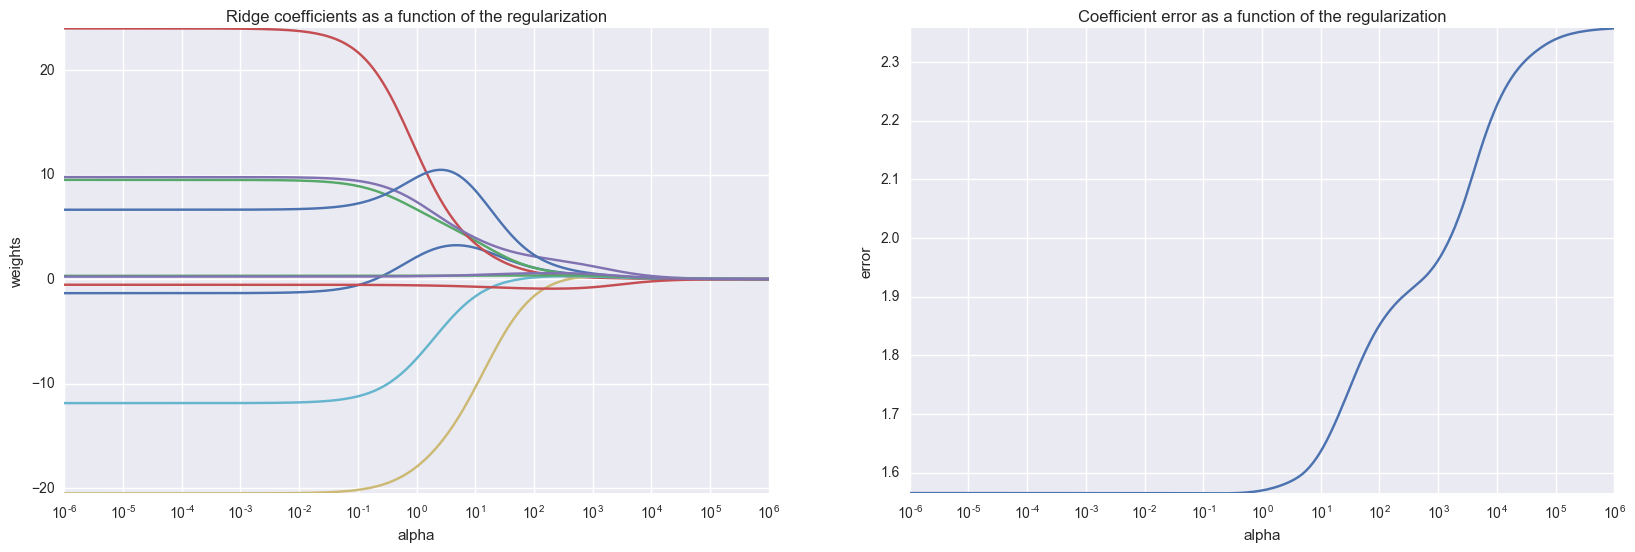

In [130]:
clf = linear_model.Ridge()

#x, y, w = make_regression(n_samples, n_features, coef=True, bias=4)

coefs = []
errors = []


alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x, y)
    y_pred = clf.predict(x)
    w = np.sum(np.fabs(y - y_pred)) / len(y) 
    
    coefs.append(clf.coef_)
    errors.append(np.mean(w))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

In [134]:

# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
Train_TestError = linear_model.ElasticNet(l1_ratio=0.7)
train_errors = list()
test_errors = list()
for alpha in alphas:
    Train_TestError.set_params(alpha=alpha)
    Train_TestError.fit(X_test, y_test)
    train_errors.append(Train_TestError.score(X_train,y_train))
    test_errors.append(Train_TestError.score(X_test,y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
Train_TestError.set_params(alpha=alpha_optim)
coef_ = Train_TestError.fit(x, y).coef_

Optimal regularization parameter : 1e-05


In [153]:
alphas = np.logspace(-5, 1, 60)
Train_TestError1 = linear_model.Ridge()
train_errors = list()
test_errors = list()
for alpha in alphas:
    Train_TestError1.set_params(alpha=alpha)
    Train_TestError1.fit(X_train, y_train)
    train_errors.append(Train_TestError1.score(X_train, y_train))
    test_errors.append(Train_TestError1.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
Train_TestError1.set_params(alpha=alpha_optim)
coef_ = Train_TestError1.fit(x, y).coef_

Optimal regularization parameter : 0.057904439806


In [214]:
coef = x

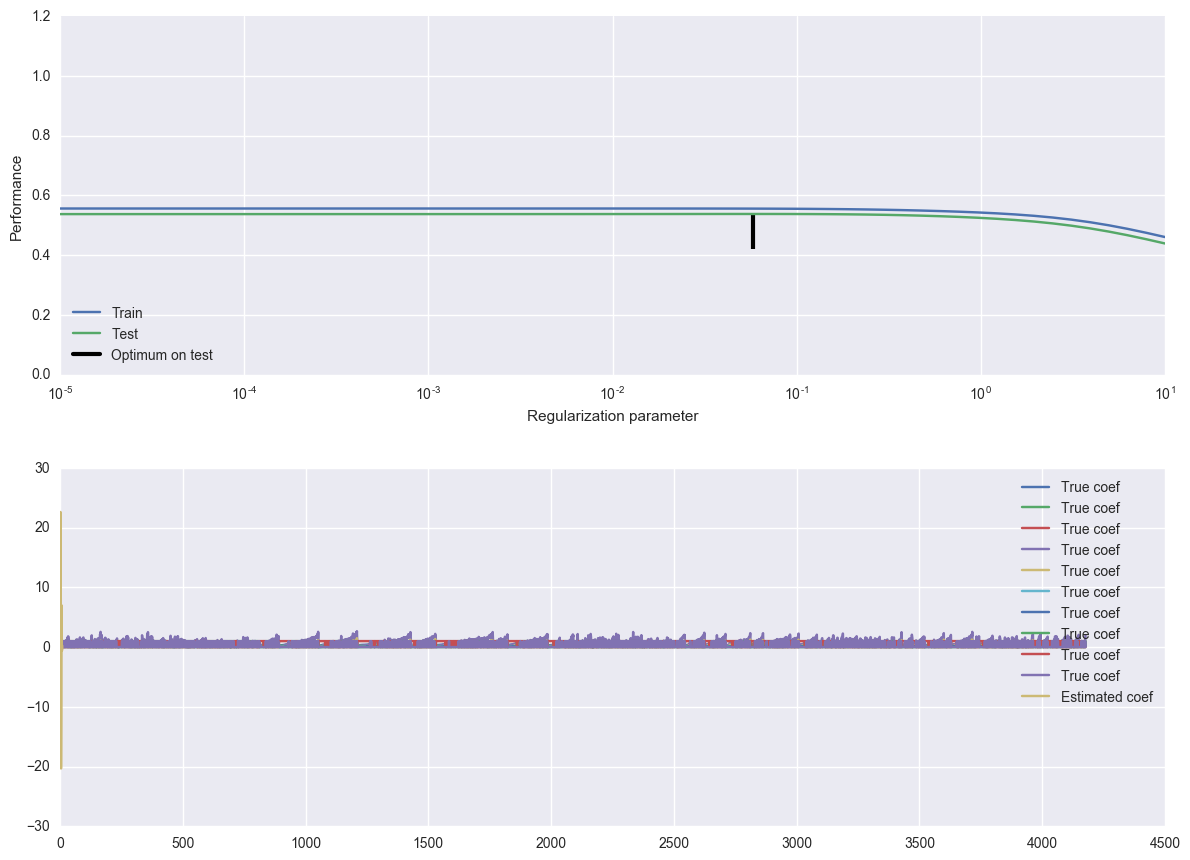

In [215]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()